# Telecom Churn Prediction
### Buiness Problem: The main objective of the project is to build a predictive model that will generate the list of customer most vulnerable to churn.
- Source: # https://www.kaggle.com/puja19/telcom-customer-churn

### Dataset Description:
- Target variable | **Churn**:  Customer who stop doing business with the company.

Numerical Variables
- SeniorCitizen: States whether Customer is a Senior Citizen or not.
- tenure: Number of Months the Customer has stayed with the Company.
- MonthlyCharges: The amount that the Customer pays monthly.
- TotalCharges:  The total amount has been charged by the customer.

Categorical Variables
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not from business (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not service (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not service (Yes, No, No internet service)
- Contract: The contract term of the customer with business(Month-to-month, One year, Two years)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))


### Importing Packages

In [295]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import suptitle
import sklearn
import sklearn.ensemble
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from scipy.stats import kurtosis 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import tensorflow as tf
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import warnings
warnings.filterwarnings("ignore")

### Setup Variable

In [2]:
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

### Explore that Data

In [3]:
# Read the raw data
raw_data = pd.read_csv('original_raw_classification_data.csv')

Raw data has 7043 rows and 21 columns before processing.

In [4]:
raw_data.shape

(7043, 21)

In [5]:
raw_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
raw_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
raw_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
raw_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

 - Convert the **TotalCharges** into float to explore this variable. As the value in the actual column is numerical

In [9]:
raw_data['TotalCharges'] = pd.to_numeric(raw_data['TotalCharges'], errors='coerce')

In [10]:
#Removing customer IDs from the data set the columns not used in the predictive model.
#As this is has unique value and not useful in Machine Leanrning
raw_data = raw_data.drop("customerID", axis=1)

In [11]:
# Impute the missing/ blank spaces with NAN values
empty_cols=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
for i in empty_cols:
    raw_data[i]=raw_data[i].replace(" ",np.nan)

In [12]:
# Percentage of Missing values in the dataset
percent_missing = raw_data.isnull().sum() / len(raw_data)
missing_value_df = pd.DataFrame({'column_name': raw_data.columns,
                                 'percent_missing': percent_missing})
#more than 5% are the missing value in the total charge
missing_value_df

,column_name,percent_missing
gender,gender,0.000000
SeniorCitizen,SeniorCitizen,0.000000
Partner,Partner,0.000000
Dependents,Dependents,0.000000
tenure,tenure,0.000000
PhoneService,PhoneService,0.000000
MultipleLines,MultipleLines,0.000000
InternetService,InternetService,0.000000
OnlineSecurity,OnlineSecurity,0.000000
OnlineBackup,OnlineBackup,0.000000


- From the above percentage we can see that **TotalCharges** has more than 0.15% missing values. Only one column has missing values so will impute it Randomly across all the dataset and check the percentage of missing values.

## Synthetically injecting missing values to the specific column.
The below code randomly inject missing values and keeping the missing proportion to be 5% for that column
Since original data has only one column with missing values. So in order to(as per project requirement) maintain the 5% missing value trend across 5 columns. Synthetically injecting missing values across these columns(**numerical and categorical**):


In [13]:
import numpy as np
import random
new_data = raw_data.copy()
null_proportion = 0.06
for c in ['tenure', 'OnlineSecurity','OnlineBackup', 'PaperlessBilling', 'PaymentMethod']:
    specific_indices = random.sample(new_data.index.values.tolist(), int(null_proportion * len(new_data)))
    new_data.loc[new_data.index.isin(specific_indices), c] = np.nan

In [14]:
# Saving the new missing file in the cvs file format
new_data.to_csv('modified_classification_data.csv')

In [15]:
# Basic Information about the new DataFrame with datatypes
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            6621 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    6621 non-null   object 
 9   OnlineBackup      6621 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  6621 non-null   object 
 16  PaymentMethod     6621 non-null   object 


Descriptive statistics on the DataFrame:

In [16]:
#Statistically describing numerical columns in the new Dataset
new_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,6621.000000,7043.000000,7032.000000
mean,0.162147,32.243921,64.761692,2283.300441
std,0.368612,24.544611,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Missing Value Check

In [17]:
for i in empty_cols:
    new_data[i]=new_data[i].replace(" ",np.nan)
# Percentage of Missing values in the dataset
percent_missing = new_data.isnull().sum() / len(new_data)
missing_value_df = pd.DataFrame({'column_name': new_data.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
gender,gender,0.000000
SeniorCitizen,SeniorCitizen,0.000000
Partner,Partner,0.000000
Dependents,Dependents,0.000000
tenure,tenure,0.059918
PhoneService,PhoneService,0.000000
MultipleLines,MultipleLines,0.000000
InternetService,InternetService,0.000000
OnlineSecurity,OnlineSecurity,0.059918
OnlineBackup,OnlineBackup,0.059918


### New Data Contain more than 5% of missing values across all dataset with minimum 5 column. Satisfying the base requiremement of assignment

# Target Variable Distribution

Mapping Binary Target variable( Churn ) to 0 and 1 where:
- **0** -> Denotes Customers who haven't churn and instance in raw data is "No"
- **1** -> Denotes Customers who haven churn and instance in raw data is "Yes"

In [18]:
# Target Variable
new_data['Churn'] = new_data["Churn"].apply(lambda x: 0 if x=='No' else 1).astype(int)

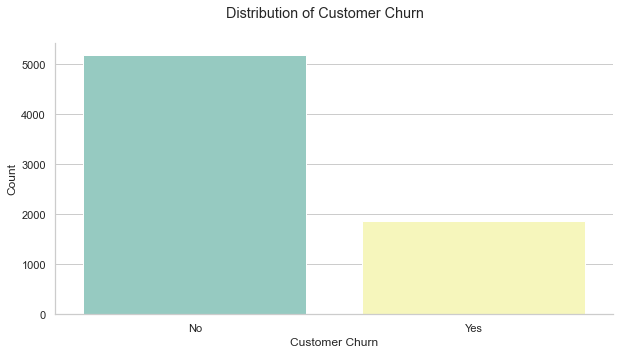

In [19]:
from seaborn import despine
sns.set(style="whitegrid")

ax=sns.countplot(x='Churn',palette="Set3", data=new_data)
ax.set_xticklabels(["No","Yes"])
ax.set_ylabel("Count")
ax.set_xlabel("Customer Churn")
suptitle("Distribution of Customer Churn")
despine()

**Insights**
-  We can observe from the bar chart there is significant amount of imbalance in the feature between **Yes** and **No**.
- **Imbalance** in the dataset

# Exploratory Data Analysis & Data Imputation

## Feature: Gender

In [20]:
new_data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

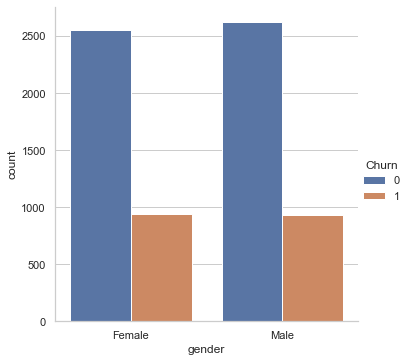

In [21]:
gender_churn = new_data[['gender', 'Churn']].groupby(['gender', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'gender', y='count', hue='Churn', data=gender_churn, kind='bar')
plt.show()

**Insights**
- There isn't a significant difference b/w male and female population's churn/no-churn count

In [22]:
# Number of missing value - No missing Value
new_data['gender'].isnull().sum()

0

## Feature: SeniorCitizen

In [23]:
new_data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

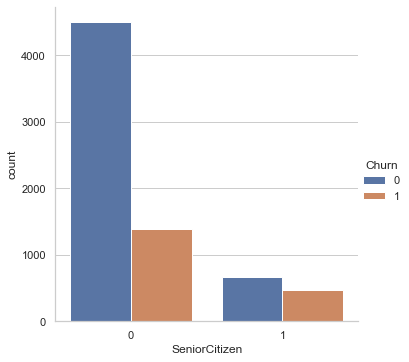

In [24]:
senior_citizen_churn = new_data[['SeniorCitizen', 'Churn']].groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'SeniorCitizen', y='count', hue='Churn', data=senior_citizen_churn, kind='bar')
plt.show()

**Insights**
- It's clearly evident that senior citizens aren't the majority customer base for the telecom company. Also, the non-senior citizen population (senior citizen=0) has significantly higher population which hasn't churned.

In [25]:
# Number of missing value
new_data['SeniorCitizen'].isnull().sum()

0

## Feature: Partner

In [26]:
new_data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

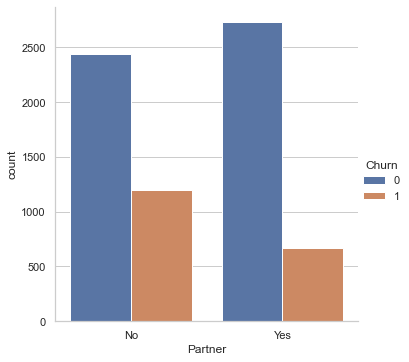

In [27]:
partner_churn = new_data[['Partner', 'Churn']].groupby(['Partner', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'Partner', y='count', hue='Churn', data=partner_churn, kind='bar')
plt.show()

**Insights**
- Clearly, the customers with 'partners' seem to retain (churn=0) with the company better compared to the ones who don't have a partner.

In [28]:
# Number of missing value
new_data['Partner'].isnull().sum()

0

## Feature: Dependents

In [29]:
new_data['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

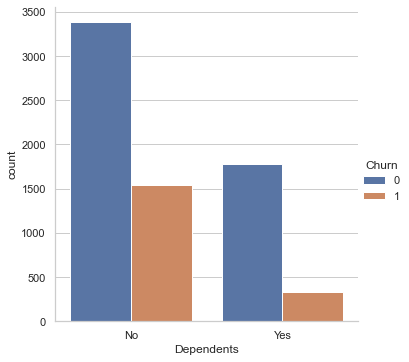

In [30]:
dependents_churn = new_data[['Dependents', 'Churn']].groupby(['Dependents', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'Dependents', y='count', hue='Churn', data=dependents_churn, kind='bar')
plt.show()

**Insights**
- Individuals without dependents seem to be a bigger customer base for the company. At the same time, this segment seems to have higher churn-rate as well compared to the ones who don't have dependents.

In [31]:
# Number of missing value
new_data['Dependents'].isnull().sum()

0

## Feature: tenure

In [32]:
new_data['tenure'].describe()

count    6621.000000
mean       32.243921
std        24.544611
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

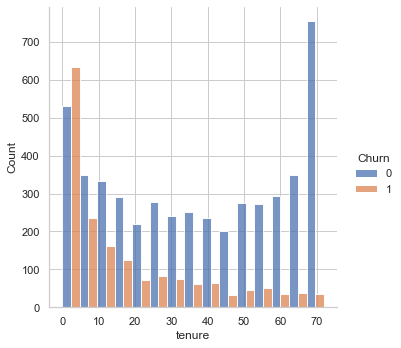

In [33]:
sns.displot(new_data, x='tenure', hue='Churn', multiple='dodge')
plt.show()

**Insights**
- As we observe above, majority of the customer-churn happens under 10 months of their association with the company. Customers who haven't churned yet, obviously have significantly high tenure period (~70 months)

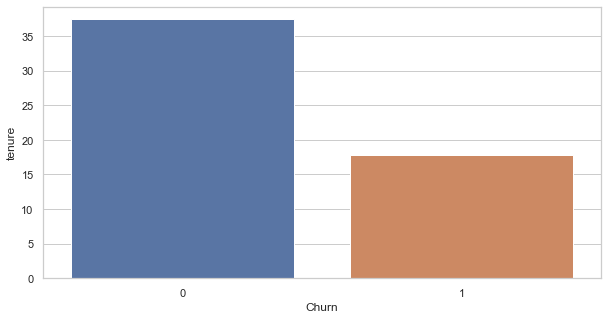

In [34]:
tenure_churn = new_data[['tenure', 'Churn']].groupby(['Churn']).mean('tenure').reset_index()
sns.barplot(x=tenure_churn['Churn'], y=tenure_churn['tenure'])
plt.show()

**Insights**
- From the above plot, we can clearly see how the average tenure of a churned customer is almost half of a non-churned customer.


In [35]:
# Number of missing value
new_data['tenure'].isnull().sum()

422

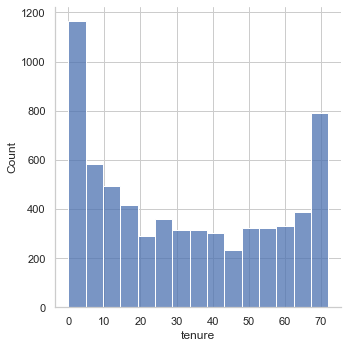

In [36]:
# Tenure Distribution
sns.displot(new_data, x='tenure')
plt.show()

### Imputation Technique
From the above distribution we can see that Tenure Variable is not skewed.
- **Mean**: **Will be right imputation technique**. Since there is not much skewness in the data and no outlier. Using Mean will be one of the appropriate way to impute missing values
- **Median**: Will not be the right imputation techniques for this variable. From the above data we can see that feature is not highly influenced by the Outlier[max value = 72 months].
- **Mode**: Will not be the right imputation techniques for this variable. Mode is  used to impute missing values in columns which are categorical in nature.But when it comes to continuous data then mode can create ambiguities.


In [37]:
# Imputing the Tenure with the mean0 of the variable
new_data['tenure'] = new_data['tenure'].replace(np.nan, new_data['tenure'].mean())

In [38]:
# Number of missing value
new_data['tenure'].isnull().sum()

0

## Feature: PhoneService

In [39]:
new_data['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

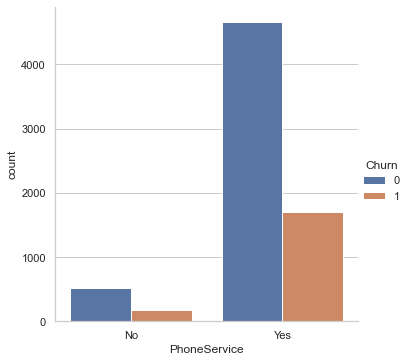

In [40]:
phone_churn = new_data[['PhoneService', 'Churn']].groupby(['PhoneService', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'PhoneService', y='count', hue='Churn', data=phone_churn, kind='bar')
plt.show()

**Insights**
- There are very few customers who dont' have the Phone Service. Majority of them have it and are company's current customers as well.

In [41]:
# Number of missing value
new_data['PhoneService'].isnull().sum()

0

## Feature: MultipleLines

In [42]:
new_data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

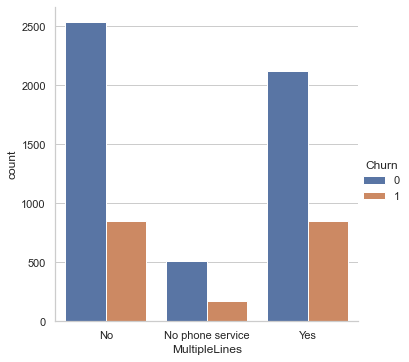

In [43]:
multipleLines_churn = new_data[['MultipleLines', 'Churn']].groupby(['MultipleLines', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'MultipleLines', y='count', hue='Churn', data=multipleLines_churn, kind='bar')
plt.show()

**Insights**
- Customers who churned didn't seem differentiate much between having 'multiple phone lines' or not. Whereas, there's higher
proportion of individuals didn't churn and aren't using 'multiple phone lines'

In [44]:
# Number of missing value
new_data['MultipleLines'].isnull().sum()

0

## Feature: InternetService

In [45]:
new_data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

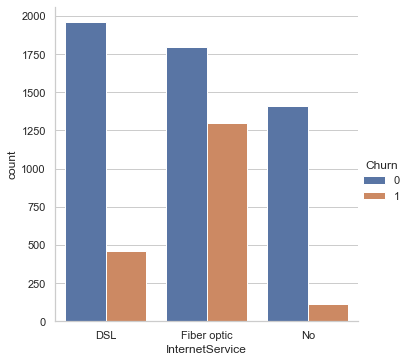

In [46]:
internet_service_churn = new_data[['InternetService', 'Churn']].groupby(['InternetService', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'InternetService', y='count', hue='Churn', data=internet_service_churn, kind='bar')
plt.show()

**Insights**
- Amongst the people who churned, majority of them used the 'Fiber Optic' internet service. Whereas, amongst the ones who did not churn, the majority of them are using DSL as the internet service

In [47]:
# Number of missing value
new_data['InternetService'].isnull().sum()

0

## Feature: OnlineSecurity

In [48]:
new_data['OnlineSecurity'].value_counts()

No                     3290
Yes                    1898
No internet service    1433
Name: OnlineSecurity, dtype: int64

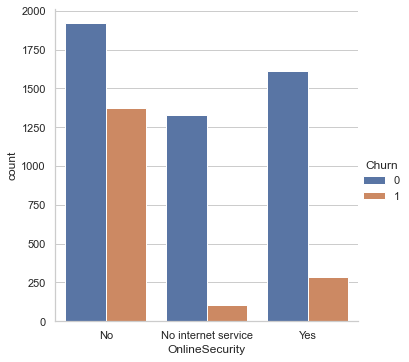

In [49]:
online_security_churn = new_data[['OnlineSecurity', 'Churn']].groupby(['OnlineSecurity', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'OnlineSecurity', y='count', hue='Churn', data=online_security_churn, kind='bar')
plt.show()

**Insights**
- From a customer churn perspective, customers who have an Online Security service are less likely to churn compared to those who have not opted for an Online Security service.

In [50]:
# Number of missing value
new_data['OnlineSecurity'].isnull().sum()

422

### Imputation Technique


In [51]:
new_data[['InternetService', 'OnlineSecurity']].groupby(
    ['InternetService', 'OnlineSecurity']).size().reset_index(name='count')

,InternetService,OnlineSecurity,count
0,DSL,No,1166
1,DSL,Yes,1105
2,Fiber optic,No,2124
3,Fiber optic,Yes,793
4,No,No internet service,1433


There is some intuitive pattern we can observe from the above table:
- When InternetService = No then -> OnlineSecurity has **No internet Service** instance
- When InternetService in [DSL, Fibre Optic] then -> OnlineSecurity has No instance

Imputation Logic:
Internet service instance value is checked across missing values of online backup. 
- If  InternetService != No then OnlineSecurity NaN value is imputed with mode of the feature.
- elif InternetService == No then OnlineSecurity NaN value is imputed with 'No internet service'.

In [52]:
## Imputing values for 'OnlineBackup' as described above
target_indices_yes = new_data[(new_data['OnlineSecurity'].isnull()) & (new_data['InternetService']!='No')].index.values.tolist()
new_data.loc[new_data.index.isin(target_indices_yes), 'OnlineSecurity'] = new_data['OnlineSecurity'].mode()[0]
    
target_indices_no = new_data[(new_data['OnlineSecurity'].isnull()) & (new_data['InternetService']=='No')].index.values.tolist()
new_data.loc[new_data.index.isin(target_indices_no), 'OnlineSecurity'] = 'No internet service'


In [53]:
# Number of missing value - No missing values 
new_data['OnlineSecurity'].isnull().sum()

0

## Feature: OnlineBackup

In [54]:
new_data['OnlineBackup'].value_counts()

No                     2906
Yes                    2283
No internet service    1432
Name: OnlineBackup, dtype: int64

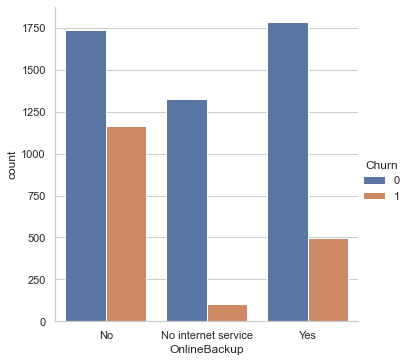

In [55]:
online_backup_churn = new_data[['OnlineBackup', 'Churn']].groupby(['OnlineBackup', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'OnlineBackup', y='count', hue='Churn', data=online_backup_churn, kind='bar')
plt.show()

**Insights**
- From a customer churn perspective, customers who have an Online Back-Up service are less likely to churn compared to those who have not opted for an Online Back-Up service.

In [56]:
# Number of missing value
new_data['OnlineBackup'].isnull().sum()

422

#### Imputation Technique

In [57]:
new_data[['InternetService', 'OnlineBackup']].groupby(
    ['InternetService', 'OnlineBackup']).size().reset_index(name='count')

,InternetService,OnlineBackup,count
0,DSL,No,1266
1,DSL,Yes,1027
2,Fiber optic,No,1640
3,Fiber optic,Yes,1256
4,No,No internet service,1432


There is some intuitive pattern we can observe from the above table:
- When InternetService = No then -> OnlineBackup has **No internet Service** instance
- When InternetService in [DSL, Fibre Optic] then -> OnlineBackup has No instance

Imputation Logic:
Internet service instance value is checked across missing values of online backup. 
- If  InternetService != No then OnlineBackup NaN value is imputed with mode of the feature.
- elif InternetService == No then OnlineBackup NaN value is imputed with 'No internet service'.

In [58]:
## Imputing values for 'OnlineBackup' as described above
target_indices_yes = new_data[(new_data['OnlineBackup'].isnull()) & (new_data['InternetService']!='No')].index.values.tolist()
new_data.loc[new_data.index.isin(target_indices_yes), 'OnlineBackup'] = new_data['OnlineBackup'].mode()[0]
    
target_indices_no = new_data[(new_data['OnlineBackup'].isnull()) & (new_data['InternetService']=='No')].index.values.tolist()
new_data.loc[new_data.index.isin(target_indices_no), 'OnlineBackup'] = 'No internet service'


In [59]:
# Number of missing value - No missing values 
new_data['OnlineBackup'].isnull().sum()

0

## Feature: DeviceProtection

In [60]:
new_data['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

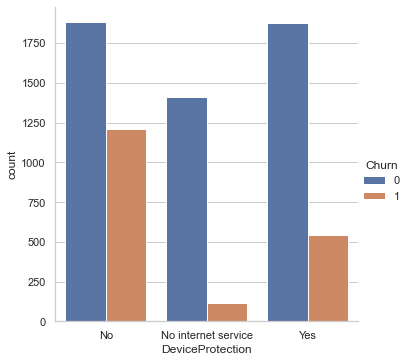

In [61]:
device_protection_churn = new_data[['DeviceProtection', 'Churn']].groupby(['DeviceProtection', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'DeviceProtection', y='count', hue='Churn', data=device_protection_churn, kind='bar')
plt.show()

**Insights**
- The customers who opted for No Device Protection has a high frequency of customer churn. Business is performing great in device protection service because there is less churn count for those customers who opted.

In [62]:
# Number of missing value - No missing values 
new_data['DeviceProtection'].isnull().sum()

0

## Feature: TechSupport

In [63]:
new_data['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

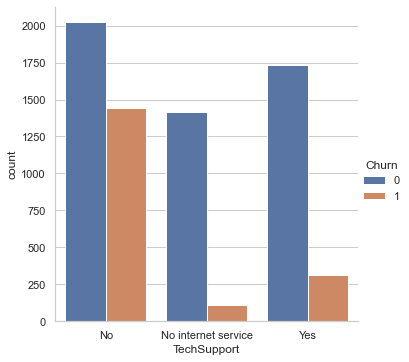

In [64]:
tech_support_churn = new_data[['TechSupport', 'Churn']].groupby(['TechSupport', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'TechSupport', y='count', hue='Churn', data=tech_support_churn, kind='bar')
plt.show()

**Insights**
- The customer who opted for No Tech Support has a high frequency of customer churn. Business is performing great in Tech Support because there is less churn count for those customers who opted for tech support.

In [65]:
# Number of missing value - No missing values 
new_data['TechSupport'].isnull().sum()

0

## Feature: StreamingTV

In [66]:
new_data['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

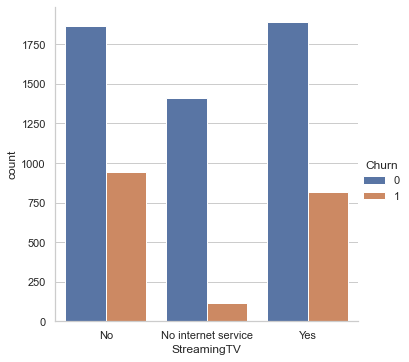

In [67]:
streamingTV_churn = new_data[['StreamingTV', 'Churn']].groupby(['StreamingTV', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'StreamingTV', y='count', hue='Churn', data=streamingTV_churn, kind='bar')
plt.show()

**Insights**
- With respect to the churned customer, there are 50-50 chances that they like the Streaming TV services or not.

In [68]:
# Number of missing value - No missing values 
new_data['StreamingTV'].isnull().sum()

0

## Feature: StreamingMovies

In [69]:
new_data['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

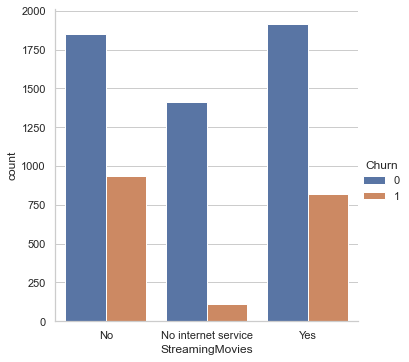

In [70]:
streaming_movies_churn = new_data[['StreamingMovies', 'Churn']].groupby(['StreamingMovies', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'StreamingMovies', y='count', hue='Churn', data=streaming_movies_churn, kind='bar')
plt.show()

**Insights**
- With respect to the churned customer, there are 50-50 chances that they like the Streaming Movies services or not. 
- The customer who opted for Streaming Movies has a high non-churned rate, as they are satisfied with the services.

In [71]:
# Number of missing value - No missing values 
new_data['StreamingMovies'].isnull().sum()

0

## Feature: Contract

In [72]:
new_data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

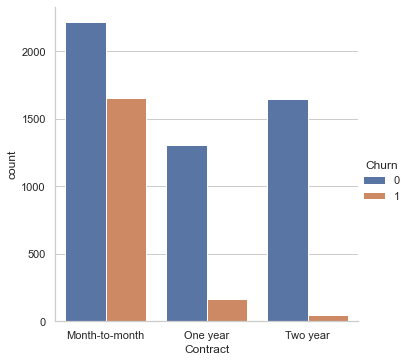

In [73]:
Contract_churn = new_data[['Contract', 'Churn']].groupby(['Contract', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'Contract', y='count', hue='Churn', data=Contract_churn, kind='bar')
plt.show()

**Insights**
- The customers who are with the business for the short-term (month-to-month) service plan have high churn instances compared to other contractual services.

In [74]:
# Number of missing value - No missing values 
new_data['Contract'].isnull().sum()

0

## Feature: PaperlessBilling

In [75]:
new_data['PaperlessBilling'].value_counts()

Yes    3928
No     2693
Name: PaperlessBilling, dtype: int64

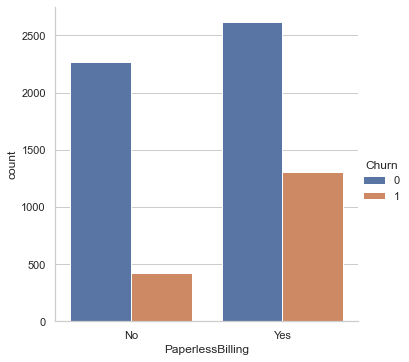

In [76]:
paperless_billing_churn = new_data[['PaperlessBilling', 'Churn']].groupby(['PaperlessBilling', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'PaperlessBilling', y='count', hue='Churn', data=paperless_billing_churn, kind='bar')
plt.show()

**Insights**
- The higher number of customers churned who opted for PaperLess Billing services. On contrary, the number non churned customer have also opted for Paperless Billing services.

In [77]:
# Number of missing value
new_data['PaperlessBilling'].isnull().sum()

422

- Since its's a categorical feature and based on the distribution across the different value it appear that mostly customer opted for paperless billing services. We will be imputing the missing value with mode value(i.e **Yes**)

In [78]:
new_data['PaperlessBilling'] = new_data['PaperlessBilling'].replace(np.nan, new_data['PaperlessBilling'].mode()[0])

In [79]:
# Number of missing value 
new_data['MonthlyCharges'].isnull().sum()

0

## Feature: PaymentMethod

In [80]:
new_data['PaymentMethod'].value_counts()

Electronic check             2216
Mailed check                 1507
Bank transfer (automatic)    1462
Credit card (automatic)      1436
Name: PaymentMethod, dtype: int64

<Figure size 1296x2160 with 0 Axes>

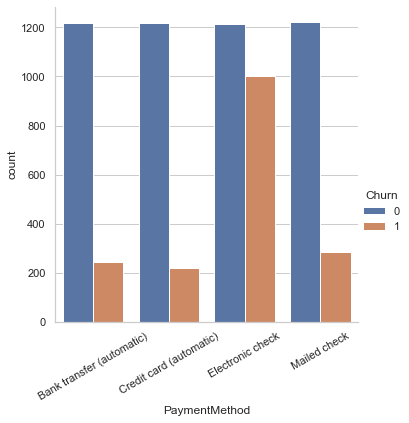

In [81]:
fig = plt.figure(figsize=(18, 30))
payment_method_churn = new_data[['PaymentMethod', 'Churn']].groupby(['PaymentMethod', 'Churn']).size().reset_index(name='count')
g= sns.factorplot(x = 'PaymentMethod', y='count', hue='Churn', data=payment_method_churn, kind='bar')
g.set_xticklabels(rotation=30)
plt.show()

**Insights**
- The highest number of customer churned who paid their bills through electronic check. 
- There is an equal number of payment modes opted by non-churned customers.


In [82]:
# Number of missing value
new_data['PaymentMethod'].isnull().sum()

422

- Since its's a categorical feature and based on the distribution across the different value it appear that electronic check is the most frequently used method. We will be imputing the missing value with mode value(i.e **Electronic check**)

In [83]:
# Imputing the PaymentMethod with the Mode of the Column
new_data['PaymentMethod'] = new_data['PaymentMethod'].replace(np.nan, new_data['PaymentMethod'].mode()[0])

In [84]:
# Number of missing value - There are no missing values
new_data['MonthlyCharges'].isnull().sum()

0

## Feature: MonthlyCharges    

In [85]:
new_data['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

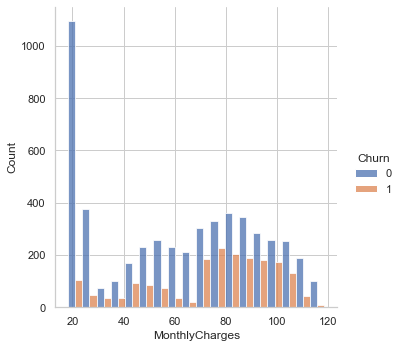

In [86]:
sns.displot(new_data, x='MonthlyCharges', hue='Churn', multiple='dodge')
plt.show()

**Insights**
- Monthly charges distribution reflects that a significant amount of non churned customers pays very less amount fee for their services. We can even observe that the churned customers were paying more monthly charges compared to the non-churned. 

- From the below bar chart, we can observe interesting thing that the average monthly charges paid by the Churned customer are high than non-churned. From the revenue perspective, we can see that **high-paying customers are dropping from the business**, which will impact the gross gain.


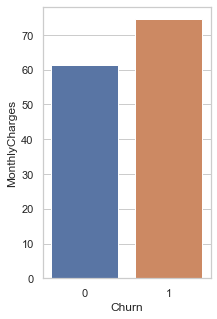

In [87]:
plt.figure(figsize=(3,5))
monthly_charges_churn = new_data[['MonthlyCharges', 'Churn']].groupby(['Churn']).mean('MonthlyCharges').reset_index()
sns.barplot(x=monthly_charges_churn['Churn'], y=monthly_charges_churn['MonthlyCharges'])
plt.show()

In [88]:
# Number of missing value - There are no missing values
new_data['MonthlyCharges'].isnull().sum()

0

## Feature: TotalCharge

In [89]:
new_data['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

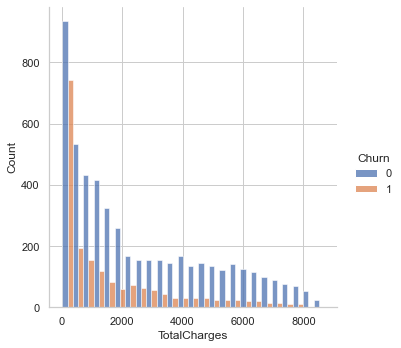

In [90]:
sns.displot(new_data, x='TotalCharges', hue='Churn', multiple='dodge')
fig.show()

**Insights**
- From the above chart, we see that relatively higher and lower total charges are paid,by customers who didn't churn compared to the ones who did. 

The distribution of the total charges shows high skewness towards the right and, from the distribution plot, we can see that there are a significant amount of outliers(due to max value = 8684) in the data.

 - From the above chart, we see that the average total charges paid by the customer who didn't churn are significantly higher than those who did. This might be because of the fewer number of churned customer and directly reflect the imbalance in the target variable(Churn=1)

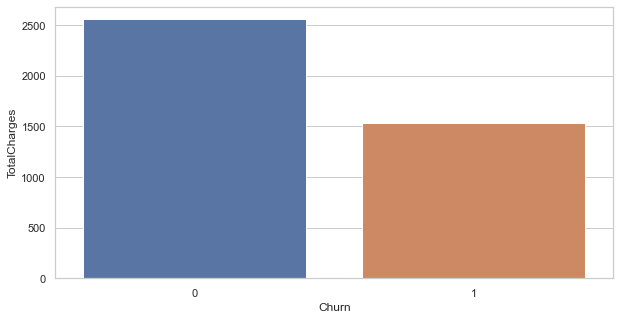

In [91]:
total_charges_churn = new_data[['TotalCharges', 'Churn']].groupby(['Churn']).mean('TotalCharges').reset_index()
sns.barplot(x=total_charges_churn['Churn'], y=total_charges_churn['TotalCharges'])
plt.show()

In [92]:
# Number of missing value
new_data['TotalCharges'].isnull().sum()

11

From the above distribution we can see that TotalCharge Variable is Skewed Right.
- **Mean**: Will not be the right imputation techniques for this variable. From the above data we can see that feature is highly influenced by the **Outlier[max value = 8684]** and mean is highly sensitive toward the outliers.
- **Mode**: Will not be the right imputation techniques for this variable. Mode is  used to impute missing values in columns which are categorical in nature.But when it comes to continuous data then mode can create ambiguities.
- **Median**: **Will be right imputation technique**. Median is not influenced by the outliers of the dataset.

In [93]:
# Imputing the TotalCharges with the Median=1397.475000 of the data
new_data['TotalCharges'] = new_data['TotalCharges'].replace(np.nan, new_data['TotalCharges'].median())

In [94]:
# Number of missing value - There are no missing values
new_data['MonthlyCharges'].isnull().sum()

0

In [95]:
# checking the final table after imputation
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [96]:
new_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Electronic check,42.30,1840.75,0
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Data Transformation

- One Hot Encoding

In [97]:
# Mapping of binary variable to 0 and 1
new_data['gender'] = new_data["gender"].apply(lambda x: 0 if x=='Female' else 1).astype(int)
new_data['Partner'] = new_data["Partner"].apply(lambda x: 0 if x=='No' else 1).astype(int)
new_data['Dependents'] = new_data["Dependents"].apply(lambda x: 0 if x=='No' else 1).astype(int)
new_data['PhoneService'] = new_data["PhoneService"].apply(lambda x: 0 if x=='No' else 1).astype(int)
new_data['PaperlessBilling'] = new_data["PaperlessBilling"].apply(lambda x: 0 if x=='No' else 1).astype(int)

In [98]:
# converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(new_data)
df_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1.0,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34.0,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2.0,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45.0,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,2.0,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [99]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int32  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int32  
 3   Dependents                               7043 non-null   int32  
 4   tenure                                   7043 non-null   float64
 5   PhoneService                             7043 non-null   int32  
 6   PaperlessBilling                         7043 non-null   int32  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float64
 9   Churn                                    7043 non-null   int32  
 10  MultipleLines_No                         7043 no

#### Raw data has 7043 rows and 41 columns after processing. Satisfying the project requirement

In [100]:
df_dummies.shape

(7043, 41)

## Final Data Preparation for Machine Learning

#### Content
- BaseLine Model
- Underlying Assumption
- HyperParamter Tuning
- Model Evaluation
- Model Visualization


### BaseLine Model

**Why Standard Scaler, not Min_max scaler?**
- Outliers can skew a probability distribution and make data scaling difficult as the calculated mean and standard deviation will be skewed by the presence of the outlier.
One approach to standardizing input variables in the presence of outliers to ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable.
So, Standardizing the data due to the presence of skewed distributions and outliers.

In [101]:
X = df_dummies.drop('Churn', axis = 1)
y = df_dummies['Churn']
# Splitting data into train and test and Applying Standarization Technique
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

Running **Logistic Model** as BaseLine Model

In [102]:
LogReg_clf = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = LogReg_clf.predict(X_test)
print("BaseLine Model train_score- Accuracy: {:.2f}".format(LogReg_clf.score(X_train, y_train)))
print("BaseLine Model test_score- Accuracy: {:.2f}".format(LogReg_clf.score(X_test, y_test)))

BaseLine Model train_score- Accuracy: 0.80
BaseLine Model test_score- Accuracy: 0.79


In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg, target_names=["Not_Churn", "Churn"]))

              precision    recall  f1-score   support

   Not_Churn       0.84      0.90      0.86      1298
       Churn       0.63      0.51      0.57       463

    accuracy                           0.79      1761
   macro avg       0.74      0.70      0.72      1761
weighted avg       0.78      0.79      0.79      1761



Here, comparing the Baseline model with the Dummy Classifier( Most Frequent) will always predict the most frequent class label in the training data.
- From the Accuracy, we can see that Logistic Regression Macro Average is equal to the Most Frequent strategy classifier i.e 74%. This means that the baseline model, predicting the actual churn customer(churn=1) as they will not churn in the future(chrun=0).
Definitely, **Accuracy is not the best evaluation parameter** for this problem.

In [104]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_train, y_train)

pred_most_frequent = dummy_majority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [0]
Test score: 0.74


### Underlying Assumptions
- **False Negative(FN)** - Classifier will predict customers that they will not churn in the future but in actual they will churn in the future. FN is most problematic as a business has to pay all the costs of acquiring a replacement customer, including foregone revenue, advertising costs, administrative costs, etc. Acquiring a new customer is always costly than acquiring a new one.
- **False Positive(FN)** -Classifier will predict customers that they will churn in the future but, in actual they will not churn in the future.FN is not problematic for businesses as they are ready to pay some $0.01  for each customer in a later campaign.

#### Why chosen roc_auc score?
A ROC curve looks pretty good (ie better than random) while misclassifying most or all of the minority class.
In contrast, PR curves are specifically tailored for the detection of rare events and are pretty useful in those scenarios. 
They will show that your classifier has a low performance if it is misclassifying most or all of the minority class. But they don't translate well to more balanced cases or cases where negatives are rare.

In our context Sensitivity (TPR) is used to see how many of the positive cases are correctly picked up (minimizing the proportion missed as false negatives = FNR) while Specificity (TNR) is used to see how many of the negative cases are correctly eliminated (minimizing the proportion found as false positives = FPR). 
Our dataset indicates the imbalance with high negative/No Churn. Thus if we always predict negative you have an Accuracy of 0.999999 - this is achieved by the simple naive algorithm that simply predicts the maximum class.
ROC Curves summarize the trade-off between the true positive rate and false-positive rate for a predictive model using different probability thresholds.


#### Functions Description: 
Looped through five classifiers: Logistic Regression, K-Nearest Neighbors, Support Vector Classifier with LinearSVC,Support Vector Classifier with linear_Kernel, Support Vector Classifier with Radial Kernel, Support Vector Classifier with Poly Kernel and, Decision Tree.

### HyperParamter Tuning

In [187]:
def specify_models():
    """
    This function returns a list of dictionaries with each dictionary containing the 'name', 'class' and 
    'parameters' information of the different ML models
    """

    knear={'name':'K Nearest Neighbors Classifier',
           'class':sklearn.neighbors.KNeighborsClassifier(),
            'parameters':{'n_neighbors':range(1,5)}
          }
    logistic ={'name':"Logistic Regression",
         'class':sklearn.linear_model.LogisticRegression(),
         'parameters':{'C':[0.001,0.01,0.1,1,10],"penalty":["l1","l2"]}
        }
    linear_svc={'name':'Linear SVM',
               'class':sklearn.svm.LinearSVC(),
                'parameters':{'C':[0.001,0.01,0.1,1,10]}
          }
    sv_linear={'name':'SVM Linear Kernel',
               'class':sklearn.svm.SVC(kernel='linear'),
                'parameters':{'C':[0.001,0.01,0.1,1,10]}
          }

    sv_radial={'name':'SVM RBF Kernel',
               'class':sklearn.svm.SVC(kernel='rbf'),
                'parameters':{'C':[0.001,0.01,0.1,1],'gamma':[0.01,0.1,1,10]}
          }
    sv_poly={'name':'SVM Poly Kernel',
               'class':sklearn.svm.SVC(kernel='poly'),
                'parameters':{'C':[0.001,0.01],'gamma':[0.01,0.1,1], 'degree':[1,2]}
          }
    decis_tree={'name':"Decision Tree Classifier",
            'class':sklearn.tree.DecisionTreeClassifier(),
            'parameters':{'max_depth':range(2,5)}
            }

    model_list = list([knear,logistic,linear_svc,sv_linear,sv_radial,sv_poly,decis_tree])
    return(model_list)

#### Which GridsearchCv metric is good for imbalanced data?
GridsearchCv- iterate the model through the grid of model parameters. Run script to train the model on each Training CV fold (created below and then find classification report by evaluating against the rest of the Training data (not the Test).
GridSearch to optimize hyperparameters across five cross-validation sets for a given model. 
I decided to use the Compute Area Under the **Receiver Operating Characteristic Curve (ROC AUC) score** to determine model performance to try and maximize true positives while minimizing false positives in model predictions.
As in our dataset, there is an issue of high Imbalance in data.

In [188]:
def train_model(model_dict, X_train, y_train, X_test, y_test, metric = 'roc_auc', k = 5):
    """
    This function trains the individual model using different hyperparamters by performing grid-search to identify the best
    model parameters, and finally computes evaluation metrics on the train and test data.
    
    Args:
    model_dict: Dictionary containing the 'name', 'class' and 'parameters' information of the ML model.
    X_train: Predictors in training data
    y_train: Target Label in training data
    X_test: Predictors in test data
    y_test: Target Label in test data
    metric: metric to evaluate the model upon
    k: k-fold value for cross-validation
    
    Returns:
    Dictionary containing model name, model performance (train and test score), best-parameters for a given model.
    
    """
    name=model_dict['name']
    param_grid = model_dict['parameters']
    
    clf=GridSearchCV(estimator=model_dict["class"], param_grid=param_grid, cv= k, scoring=metric)
    clf.fit(X_train, y_train)
    results_dict = {}
    
    results_dict['Classifier_Name'] = name    
    results_dict['Classifier'] = clf.best_estimator_
    results_dict['Best_Params'] = clf.best_params_
    results_dict['Roc_Auc_Train'] = clf.best_score_
    if results_dict['Classifier_Name'] in ['K Nearest Neighbors Classifier','Logistic Regression','Decision Tree Classifier']:
        pred_prob_train = results_dict['Classifier'].predict_proba(X_train)[:, 1]
        pred_prob = results_dict['Classifier'].predict_proba(X_test)[:, 1]
        
    else:
    #'Support Vector Classifier with Poly Kernel','Support Vector Classifier with Radial Kernel',
    #'Support Vector Classifier with linear_Kernel','Support Vector Classifier with LinearSVC']
        pred_prob_train = results_dict['Classifier'].decision_function(X_train)
        pred_prob = results_dict['Classifier'].decision_function(X_test)
        
    #Train Score and Evaluation Parameter
    results_dict['Train_Score'] =  roc_auc_score(y_train, pred_prob_train)
    fpr, tpr, threshold = roc_curve(y_train, pred_prob_train)
    results_dict['FalsePositive_Train'] = fpr
    results_dict['TruePostive_Train'] = tpr


    # Test Score and Evaluation Parameter
    results_dict['Test_Score'] =  roc_auc_score(y_test, pred_prob)
    fpr1, tpr1, threshold1 = roc_curve(y_test, pred_prob)
    results_dict['FalsePositive_Test'] = fpr1
    results_dict['TruePostive_Test'] = tpr1

    return(results_dict)

In [189]:
def train_all_models(models, X_train, y_train, X_test, y_test, metric ='roc_auc', k = 5):
    """
    This function iterates over the list of models that get eventually trained by invoking train_model function 
    
    Args:
    models: Dictionary containing the 'name', 'class' and 'parameters' information of the ML model.
    X_train: Predictors in training data
    y_train: Target Label in training data
    X_test: Predictors in test data
    y_test: Target Label in test data
    metric: metric to evaluate the model upon
    k: k-fold value for cross-validation
    
    Returns:
    DataFrame which contains the model name, model performance (train and test score), best-parameters for all the models.
    """
    final_list = []

    for i in range(0,len(models)):
        tr_model = train_model(models[i] ,X_train, y_train, X_test, y_test)
        final_list.append(tr_model)

    #Sort the final table of model in decending order "Test_Score": Model which return the highest Test_score is at top
    final_dataframe=pd.DataFrame(final_list).sort_values(by='Test_Score', ascending = False)
    return final_dataframe

### Model Evaluation

Here we will check the best parameter value of each model with their Roc_Auc score acoss train and test data

In [190]:
model = specify_models()
result_table = train_all_models(model,X_train, y_train,X_test, y_test)
project1_without_pca= result_table[['Classifier_Name','Classifier','Best_Params','Train_Score','Test_Score']]
project1_without_pca

,Classifier_Name,Classifier,Best_Params,Train_Score,Test_Score
1,Logistic Regression,"LogisticRegression(C=0.01, class_weight=None, ...","{'C': 0.01, 'penalty': 'l2'}",0.849120,0.822881
2,Linear SVM,"LinearSVC(C=0.001, class_weight=None, dual=Tru...",{'C': 0.001},0.847086,0.818124
3,SVM Linear Kernel,"SVC(C=0.001, break_ties=False, cache_size=200,...",{'C': 0.001},0.842684,0.811180
5,SVM Poly Kernel,"SVC(C=0.01, break_ties=False, cache_size=200, ...","{'C': 0.01, 'degree': 1, 'gamma': 0.1}",0.842670,0.811175
6,Decision Tree Classifier,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",{'max_depth': 4},0.843081,0.810432
4,SVM RBF Kernel,"SVC(C=0.001, break_ties=False, cache_size=200,...","{'C': 0.001, 'gamma': 0.01}",0.837831,0.800697
0,K Nearest Neighbors Classifier,"KNeighborsClassifier(algorithm='auto', leaf_si...",{'n_neighbors': 4},0.905052,0.743922


##### From the below metric we can see that:
- Best Model: Logistic Regression
- Best Parameter: 'C': 1, 'penalty': 'l2' - Lasso Regression(penalty equal to the square of the magnitude of coefficients)
- Train Score: 85%
- Test Score: 82%

From the chart, we can see that K Nearest Neighbors there might be the case of overfitting because of high variation in the train and test scores. From the train Perspective we can say that KNN will perform better only on train set.
- Train Score: 90%
- Test Score: 74%

### Model Visualization

Lets see the Roc Curve for Train and Test Dataset across all the Models

From ROC curve acorss all the model we can clearly see that KNN under-perform on the test dataset due to overfitting and Logistic Regression perfomed well compared to all other models in the dataset

- Train Roc Curve

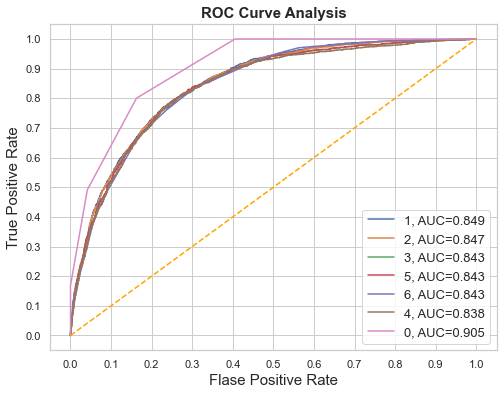

In [109]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['FalsePositive_Train'], 
             result_table.loc[i]['TruePostive_Train'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['Train_Score']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

- Test Roc Curve

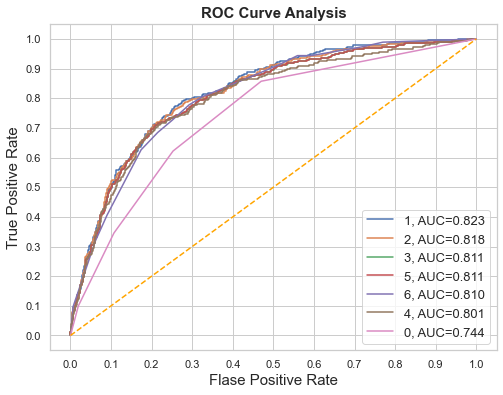

In [110]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['FalsePositive_Test'], 
             result_table.loc[i]['TruePostive_Test'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['Test_Score']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#### Re-training the model on the entire dataset with the best model parameters obtained from above step using HyperParameter tunning

In [111]:
X_scaled = scaler.transform(X)

In [112]:
final_logistic = LogisticRegression(penalty = 'l2', C = 1, solver = 'lbfgs', max_iter = 500).fit(X_scaled, y)

# Project 2

### Function for Model Evaluation

In [325]:
def  model_eval(model_name, model,X_train,X_test):
    """
    This function will fit the defined model on train and test and return the train and test score with roc_auc scoring.
    Args:
    model_name: Model name in the string format
    model: ML Model
    X_train: Predictors in training data
    X_test: Predictors in test data
    
    Returns:
    List contain the ML model name, it's train score, test score, false positive rate and true positive rate.
    
    """
    model.fit(X_train, y_train)
    pred_prob_train = model.predict_proba(X_train)[:, 1]
    pred_prob_test = model.predict_proba(X_test)[:, 1]
    train_score = roc_auc_score(y_train, pred_prob_train)
    test_score = roc_auc_score(y_test, pred_prob_test)
    fpr, tpr, threshold1 = roc_curve(y_test, pred_prob_test)
    return [[model_name, train_score,train_score,fpr,tpr]]

In [326]:
X = df_dummies.drop('Churn', axis = 1)
y = df_dummies['Churn']
# Splitting data into train and test and Applying Standarization Technique
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Hard Voting

Content
- Hard Voting Classifier
- Soft Voting Classifier
- Model Evaluation
- Model Performance - Visualization

#### Hard Voting Classifier

In hard voting (also known as majority voting), every individual classifier votes for a class, and the majority wins. In statistical terms, the predicted target label of the ensemble is the mode of the distribution of individually predicted labels.

In [327]:
log_clf = LogisticRegression(C= 0.01, penalty= 'l2')
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(4)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C=0.001, probability = True)
svm_clf.fit(X_train, y_train)

hard_voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
hard_voting_clf.fit(X_train, y_train)
y_pred_hard_test = hard_voting_clf.predict(X_test)

from sklearn.metrics import roc_auc_score
for clf in (log_clf, knn_clf, svm_clf, hard_voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, roc_auc_score(y_test, y_pred))

LogisticRegression 0.6986125855694256
KNeighborsClassifier 0.6192422633924264
SVC 0.5
VotingClassifier 0.6125780815809003


#### Soft Voting Classifier

In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class. The predictions are weighted by the classifier's importance and summed up. Then the target label with the greatest sum of weighted probabilities wins the vote.

In [328]:
log_clf = LogisticRegression(C= 0.01, penalty= 'l2')
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(4)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C=0.001, probability = True)
svm_clf.fit(X_train, y_train)

soft_voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
soft_voting_clf.fit(X_train, y_train)
y_pred_soft_test = soft_voting_clf.predict(X_test)

from sklearn.metrics import roc_auc_score
for clf in (log_clf, knn_clf, svm_clf, soft_voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, roc_auc_score(y_test, y_pred))

LogisticRegression 0.6986125855694256
KNeighborsClassifier 0.6192422633924264
SVC 0.5
VotingClassifier 0.6895947245637915


#### Model Evaluation

In [329]:
cols = ['Classifier_Name', 'Test_Score', 'FalsePositive_Test', 'TruePostive_Test']
#Hard Voting
test_score_hard = roc_auc_score(y_test, y_pred_hard_test)
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_hard_test)

voting_clf = result_table[cols].append(pd.DataFrame([['Hard Voting',test_score_hard, fpr1, tpr1]],columns=cols)).reset_index(drop=True)

#Soft Voting
test_score_soft = roc_auc_score(y_test, y_pred_soft_test)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_soft_test)
voting_clf = voting_clf[cols].append(pd.DataFrame([['Soft Voting',test_score_soft, fpr2, tpr2]],columns=cols)).reset_index(drop=True)

In [330]:
voting_clf

,Classifier_Name,Test_Score,FalsePositive_Test,TruePostive_Test
0,Logistic Regression,0.812717,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.010799136069114..."
1,Linear SVM,0.810386,"[0.0, 0.0, 0.0, 0.0015408320493066256, 0.00154...","[0.0, 0.0021598272138228943, 0.012958963282937..."
2,SVM Linear Kernel,0.806178,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.008639308855291..."
3,SVM Poly Kernel,0.805611,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.006479481641468..."
4,SVM RBF Kernel,0.795921,"[0.0, 0.0, 0.0, 0.0015408320493066256, 0.00154...","[0.0, 0.0021598272138228943, 0.008639308855291..."
5,Decision Tree Classifier,0.791555,"[0.0, 0.0, 0.020030816640986132, 0.04006163328...","[0.0, 0.004319654427645789, 0.1533477321814254..."
6,K Nearest Neighbors Classifier,0.736171,"[0.0, 0.02234206471494607, 0.09244992295839753...","[0.0, 0.09719222462203024, 0.3174946004319654,..."
7,Hard Voting,0.612578,"[0.0, 0.05778120184899846, 1.0]","[0.0, 0.28293736501079914, 1.0]"
8,Soft Voting,0.690675,"[0.0, 0.11325115562403698, 1.0]","[0.0, 0.4946004319654428, 1.0]"


#### Model Performance Visualization

Let's **compare** the voting classifier with our pre-researched **logistic regression**( which was one of the best model for Telcom Churn prediction).
- Among hard voting and soft voting we can see that Soft voting classifier peroforms better than Hard voting because in soft voting average performance of all the ensemble model is taken and hard voting is naive based.

<IPython.core.display.Javascript object>


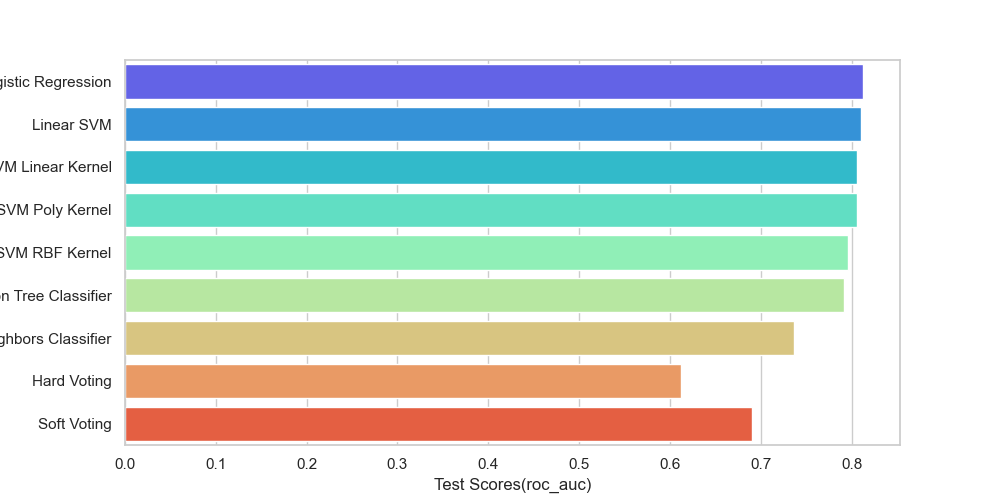

Text(0.5, 0, 'Test Scores(roc_auc)')

In [349]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=voting_clf['Test_Score'],y=voting_clf['Classifier_Name'],orient='h',palette='rainbow')
plt.ylabel('Models')
plt.xlabel('Test Scores(roc_auc)')

## PCA (Principal Component Analysis)

Content
- Choosing Number of PCA component
- Compute the components and projected features
- Before and After PCA
- PCA Performance - Visualization

PCA can be used to map data to a lower dimensional space while minimizing information loss. It's useful for data visualization, where you're limited to 2-D and 3-D plots. Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

In [343]:
X = df_dummies.drop('Churn', axis = 1)
y = df_dummies['Churn']
# Splitting data into train and test and Applying Standarization Technique
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#### Choosing Number of PCA component
- A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

<IPython.core.display.Javascript object>


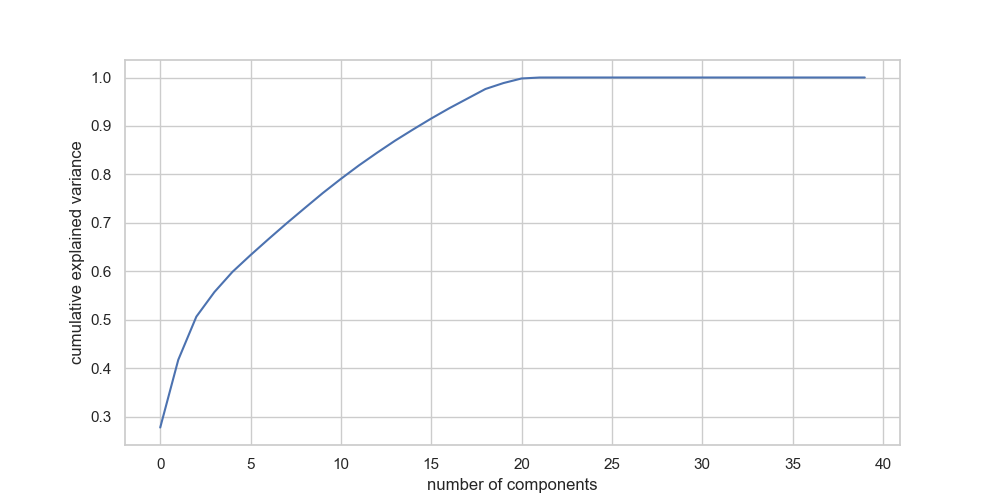

In [350]:
from sklearn.decomposition import PCA
fig = plt.figure(figsize=(10,5))
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

This curve quantifies how much of the total, 40-dimensional variance is contained within the first $N$ components. From above we see that first 10 components contain approximately 80% of the variance, while you need around 20 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about about **15** components to retain 90% of the variance.

#### Compute the components and projected features

From the cumulative explained variance plot we have got the n_components = 0.95. Now, PCA replaces original variables with new variables, called principal components, which are orthogonal (i.e. they have zero covariations) and have variances (called eigenvalues) in ascending order.

In [118]:
pca = PCA(n_components= 0.90)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [119]:
X_train_pca[:5]

array([[-1.19153208e+00, -2.30445329e+00,  1.19004540e+00,
        -7.69555180e-01,  8.69950630e-01,  1.06956325e-01,
        -1.82655958e-01,  2.15507045e+00, -2.00762306e-01,
         2.69265223e+00, -1.22800953e+00, -8.27463368e-01,
        -1.49344316e-01, -9.50206946e-01,  2.55901351e-03,
        -8.99935653e-01],
       [-1.22387906e+00,  1.05042505e+00,  1.34400252e+00,
        -3.23853536e-01,  2.07071558e+00,  5.55591923e-01,
         6.46799070e-01,  1.34998046e+00,  3.59367362e+00,
         6.95352810e-01, -5.78350509e-01, -2.02150249e-01,
         1.76437997e+00,  1.39110909e+00,  2.24844389e+00,
         1.14019031e+00],
       [-1.32741001e+00, -2.39721790e+00,  3.20689677e+00,
         3.94996412e+00,  4.52459167e-01, -9.12927739e-02,
        -5.58641712e-01,  7.01298327e-01,  5.36626936e-01,
         8.68486951e-01, -1.18568801e+00,  1.41108452e+00,
        -2.00717967e+00,  7.29777803e-01, -1.96657551e+00,
         4.10763408e-01],
       [ 6.35311024e+00,  1.47235718e

#### Before and After PCA

Functions Description: Project 1

- **specify_models()**: Looped through five classifiers: Logistic Regression, K-Nearest Neighbors, Support Vector Classifier with LinearSVC,Support Vector Classifier with linear_Kernel, Support Vector Classifier with Radial Kernel, Support Vector Classifier with Poly Kernel and, Decision Tree.
- **train Model**: This function trains the individual model using different hyperparamters by performing **Grid-Search to every mode** to identify the best model parameters, and finally computes evaluation metrics on the train and test data.
- **train_all_model**: This function iterates over the list of models that get eventually trained by invoking train_model function


Using these function to check the best parameter value of each model with their Roc_Auc score acoss train and test data on **PCA processed data(X_train_pca,X_test_pca)**.


In [211]:
# Running Grid Search on all the Model to find best parameter.
model = specify_models()
result_table_pca = train_all_models(model,X_train_pca, y_train,X_test_pca, y_test)
project2_with_pca = result_table_pca[['Classifier_Name','Classifier','Best_Params','Train_Score','Test_Score']]

##### Comparing the PCA processed best parameter and model performance with Project 1(with PCA)

In [199]:
# Project 1 -  Parameters
project1_without_pca

,Classifier_Name,Classifier,Best_Params,Train_Score,Test_Score
1,Logistic Regression,"LogisticRegression(C=0.01, class_weight=None, ...","{'C': 0.01, 'penalty': 'l2'}",0.849120,0.822881
2,Linear SVM,"LinearSVC(C=0.001, class_weight=None, dual=Tru...",{'C': 0.001},0.847086,0.818124
3,SVM Linear Kernel,"SVC(C=0.001, break_ties=False, cache_size=200,...",{'C': 0.001},0.842684,0.811180
5,SVM Poly Kernel,"SVC(C=0.01, break_ties=False, cache_size=200, ...","{'C': 0.01, 'degree': 1, 'gamma': 0.1}",0.842670,0.811175
6,Decision Tree Classifier,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",{'max_depth': 4},0.843081,0.810432
4,SVM RBF Kernel,"SVC(C=0.001, break_ties=False, cache_size=200,...","{'C': 0.001, 'gamma': 0.01}",0.837831,0.800697
0,K Nearest Neighbors Classifier,"KNeighborsClassifier(algorithm='auto', leaf_si...",{'n_neighbors': 4},0.905052,0.743922


In [200]:
# Project 2 - PCA processed Parameter
project2_with_pca

,Classifier_Name,Classifier,Best_Params,Train_Score,Test_Score
1,Logistic Regression,"LogisticRegression(C=0.01, class_weight=None, ...","{'C': 0.01, 'penalty': 'l2'}",0.840114,0.812717
2,Linear SVM,"LinearSVC(C=0.1, class_weight=None, dual=True,...",{'C': 0.1},0.839752,0.810388
3,SVM Linear Kernel,"SVC(C=10, break_ties=False, cache_size=200, cl...",{'C': 10},0.838065,0.806178
5,SVM Poly Kernel,"SVC(C=0.01, break_ties=False, cache_size=200, ...","{'C': 0.01, 'degree': 1, 'gamma': 1}",0.837740,0.805611
4,SVM RBF Kernel,"SVC(C=0.01, break_ties=False, cache_size=200, ...","{'C': 0.01, 'gamma': 0.01}",0.832395,0.795921
6,Decision Tree Classifier,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",{'max_depth': 4},0.834498,0.791555
0,K Nearest Neighbors Classifier,"KNeighborsClassifier(algorithm='auto', leaf_si...",{'n_neighbors': 4},0.903771,0.736171


By comparing above two table we can clearly see that Test Score are lower for pca processed data than scaled data(project 1).

**Support Vector Classifier** - Significant variation in the parameter we can observe in the Support Vector Classifier. The value of "C" and "gamma" is changed after grid search on PCA

**Decision Tree and SVC(Radial Kernel)** - Model performance in form of rank has changed between two. 
- Without PCA: Decision tree was performing better than SVC(radial kernel) with 81.14% and 80.44% respectively
- With PCA: SVC(radial kernel) is performing better than Decision tree with 80.06% and 79.52% respectively

**Logistic Regression** - In both model processing Logistic regression performed will on unseen data(test data). 
- PCA- Test Score:0.813167
- Without PCA- Test Score - 0.820157

Model performed well on scaled data without principal component analysis.

**K Nearest Neighbors Classifier**: In both model processing KNN over performed on train dataset compared to the test data.There might be the case of overfitting because of high variation in the train and test scores.  

- PCA - Test Score: 0.748328
- Without PCA - Test Score: 0.730977

Model performed well on scaled data without principal component analysis.


**Result of Model with PCA**

<IPython.core.display.Javascript object>


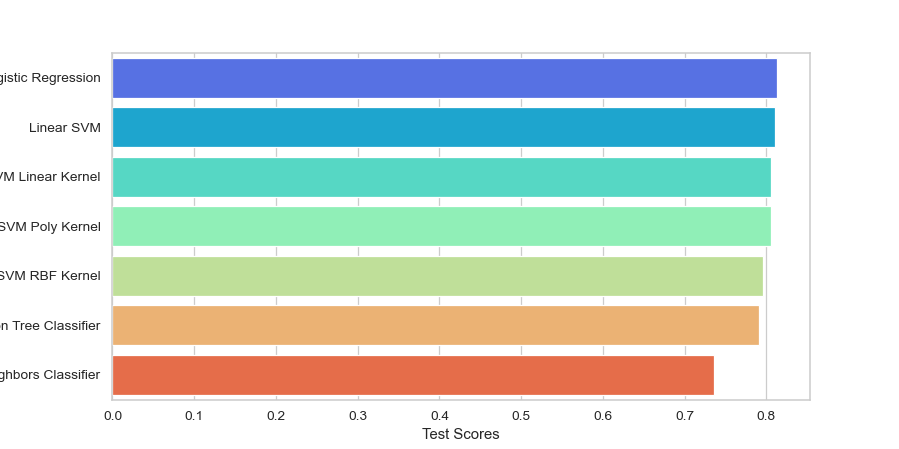

Text(0.5, 0, 'Test Scores')

In [281]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=project2_with_pca['Test_Score'],y=project2_with_pca['Classifier_Name'],orient='h',palette='rainbow')
plt.ylabel('Models with PCA')
plt.xlabel('Test Scores')

**Result Without PCA** 

<IPython.core.display.Javascript object>


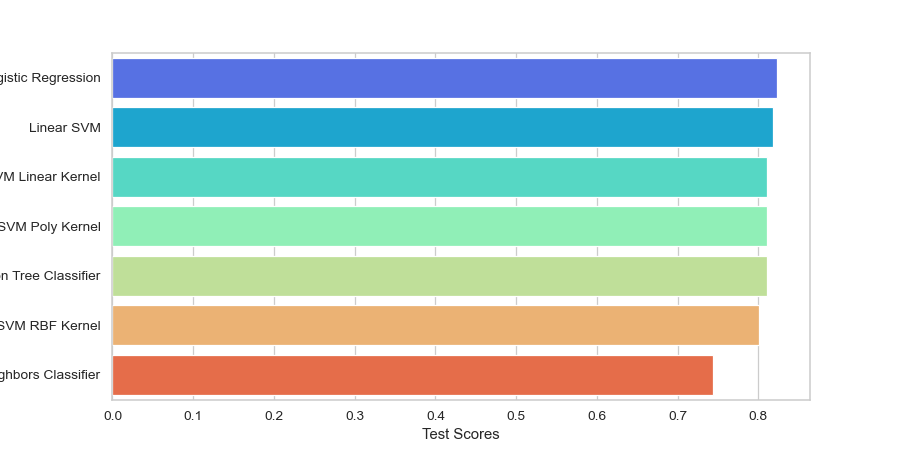

Text(0.5, 0, 'Test Scores')

In [280]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=project1_without_pca['Test_Score'],y=project1_without_pca['Classifier_Name'],orient='h',palette='rainbow')
plt.ylabel('Models with PCA')
plt.xlabel('Test Scores')

**ROC-AUC Curve**
- We can clearly see that **Model without PCA is performing better for our case**. Every model is performing better without PCA. So, **PCA has not helped in getting better result**.

In [224]:
result_table_pca = result_table_pca.reset_index(drop=True)

<IPython.core.display.Javascript object>


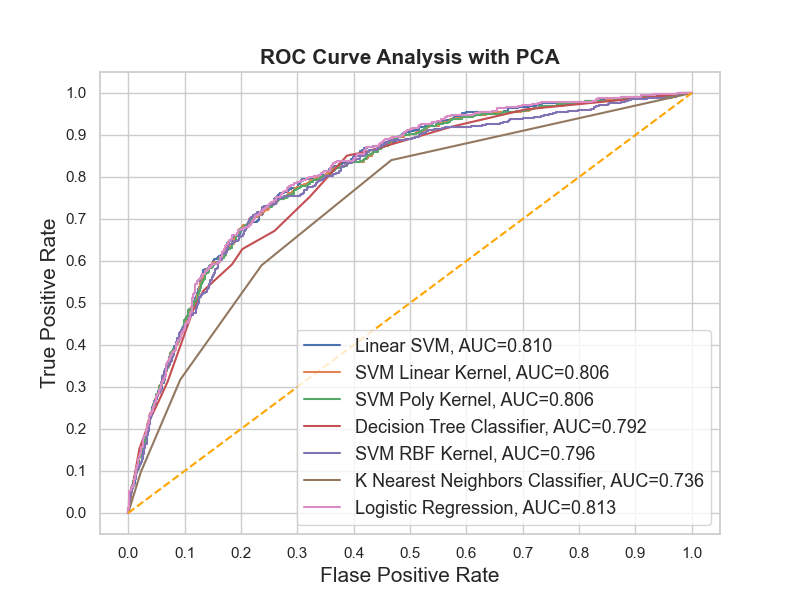

<IPython.core.display.Javascript object>


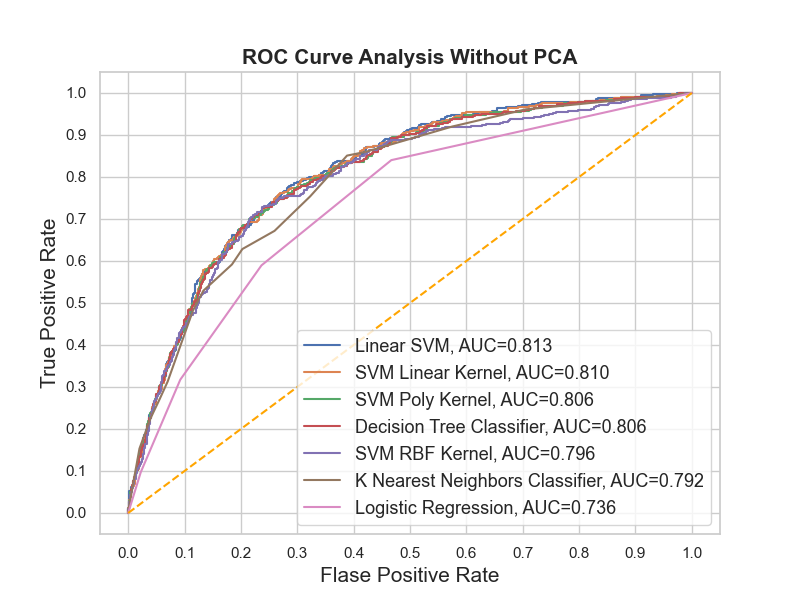

In [225]:
# With PCA
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table_pca.loc[i]['FalsePositive_Test'], 
             result_table_pca.loc[i]['TruePostive_Test'], 
             label="{}, AUC={:.3f}".format(result_table_pca.loc[i]['Classifier_Name'],
                                           result_table_pca.loc[i]['Test_Score']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis with PCA', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#Without PCA
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['FalsePositive_Test'], 
             result_table.loc[i]['TruePostive_Test'], 
             label="{}, AUC={:.3f}".format(result_table_pca.loc[i]['Classifier_Name'], result_table.loc[i]['Test_Score']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis Without PCA', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#### PCA Performance - Visualization

In visualization, let's focus on the step-wise-step the total variance and explainabilty by the PCA(dimentionality reduction). In our project Features are only 40 but will perform the visualization on selective features to check it's operation.
- 2D PCA representation
- 3D PCA representation

In [123]:
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X_train) # project the original data into the PCA space

In [124]:
# let's reshape the pca X_new array table to get better visualization
X_org = X_train[:100]
X_new = X_new[:100]
y_pca = y_train[:100]
X_new.shape

(100, 2)

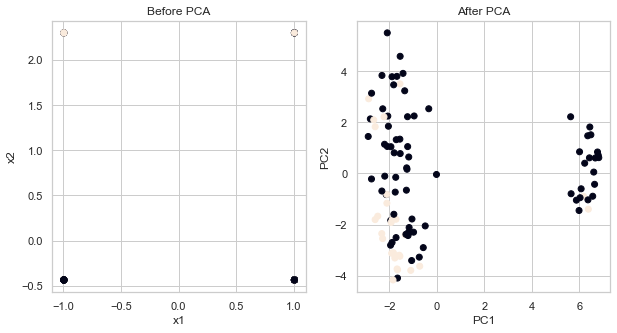

In [125]:
fig, axes = plt.subplots(1,2)

axes[0].scatter(X_org[:,0], X_org[:,1], c=y_pca)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

axes[1].scatter(X_new[:,0], X_new[:,1], c=y_pca)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')

plt.show()

We can see that in the PCA space, the variance is maximized along PC1 (explains 27% of the variance) and PC2 (explains 14% of the variance). Together, they explain 41%. There are lots overlapping of point, which means the real information of most of the features are not encountered.

In [126]:
pca.explained_variance_ratio_

array([0.27783514, 0.13975671])

### 3D Plot

To experiment 3D plots, we first need to apply a PCA to our dataset again to create 3 principal components.

In [127]:
# The PCA model
pca = PCA(n_components=3) # estimate only 3 PCs
X_new = pca.fit_transform(X_train) # project the original data into the PCA space

In [128]:
# let's reshape the pca X_new array table to get better visualization
X_new = X_new[:100]
X_new.shape

(100, 3)

<IPython.core.display.Javascript object>


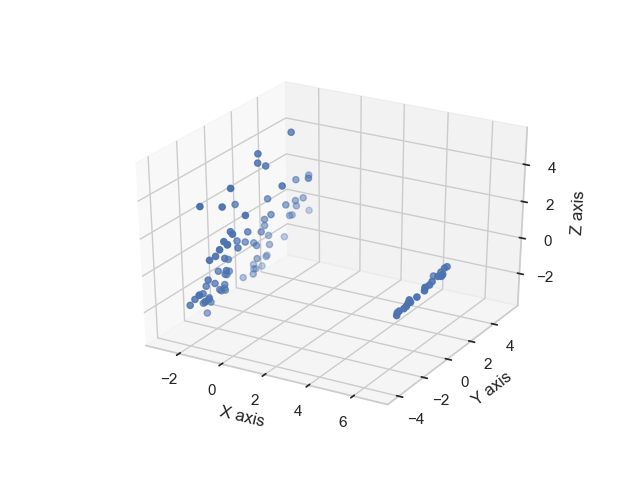

Text(0.5, 0, 'Z axis')

In [184]:
%matplotlib notebook

fig = plt.figure()

ax = fig.add_subplot(projection='3d')
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], cmap=plt.cm.Spectral)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

The total explained variance with two principal components was %40. It has increased by %8 when the third principal component is added. There are lots overlapping of point, which means that we loose the information of actual feature. So that's why we use PCA to retain the information of actual feature.

In [130]:
pca.explained_variance_ratio_

array([0.27783514, 0.13975671, 0.0889838 ])

## Gradient Boosting

Content
- Grid Search
- Model Performance
- Comparing Model Performance and Visualization

At each stage of gradient boosting, it assumes that there is some imperfect model(weak learner), and gradient boosting improves weak learner. Different ensemble methods are evaluated and Gradient Boosting Classifier performs better compared with other methods.

In [132]:
X = df_dummies.drop('Churn', axis = 1)
y = df_dummies['Churn']
# Splitting data into train and test and Applying Standarization Technique
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#### Grid Search
Performed grid search to find the best parameter (n_estimators and max_depth). 

In [137]:
param_grid = {'n_estimators': range(5,40,5),
             'max_depth': range(2,40,5)}
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=0, learning_rate=1.0), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 2, 'n_estimators': 10}
Best cross-validation score: 0.85


#### Model Performance
After getting the best parameter from the grid search, here we will check the model performance- train score and test score.
- Gradient Boost is considered to be the advanced model in machine learning. Later will compare it's performance with **Logistic Regression**.

In [239]:
# Model performance from best paramteric values
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=10, learning_rate=1.0, random_state=0)
model_metric = model_eval('Gradiant_Boost',gbrt,X_train,X_test)

# The result_table is from the project 1 which contain the model performance.
cols = ['Classifier_Name', 'Train_Score', 'Test_Score', 'FalsePositive_Test', 'TruePostive_Test']# desired column for plot
gradient_boost= result_table[cols].append(pd.DataFrame(model_metric,columns=cols)).sort_values(by=['Test_Score'], ascending=False).head().reset_index(drop=True)

print(" The Train Score for the Gradient Boosting: {:.2f} \n The Test Score for the Gradient Boosting:{:.2f}".format(gradient_boost.iloc[0]['Train_Score'],gradient_boost.iloc[0]['Test_Score']))

 The Train Score for the Gradient Boosting: 0.86 
 The Test Score for the Gradient Boosting:0.86


#### Comparing Model Performance

Logsitic Regression was best model from the project 1 with 82% test score, which means logistic regression was successful in predicting correctly the Churn of customer with only 18% of missclassification error
Whereas, in Gradient Booting we can see that model has outperformed with 94% test score, which mean Gradient boost has only 6% of misclassification error, which is 3 times less than logistic regression.

In [240]:
gradient_boost

,Classifier_Name,Train_Score,Test_Score,FalsePositive_Test,TruePostive_Test
0,Gradiant_Boost,0.861771,0.861771,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0007704160246...","[0.0, 0.0021598272138228943, 0.006479481641468..."
1,Logistic Regression,0.840114,0.812717,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.010799136069114..."
2,Linear SVM,0.839752,0.810386,"[0.0, 0.0, 0.0, 0.0015408320493066256, 0.00154...","[0.0, 0.0021598272138228943, 0.012958963282937..."
3,SVM Linear Kernel,0.838065,0.806178,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.008639308855291..."
4,SVM Poly Kernel,0.837740,0.805611,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.006479481641468..."


From the below ROC chart we can see that **Gradient Bossting** is performing best among all other models with 86% of test score.

<IPython.core.display.Javascript object>


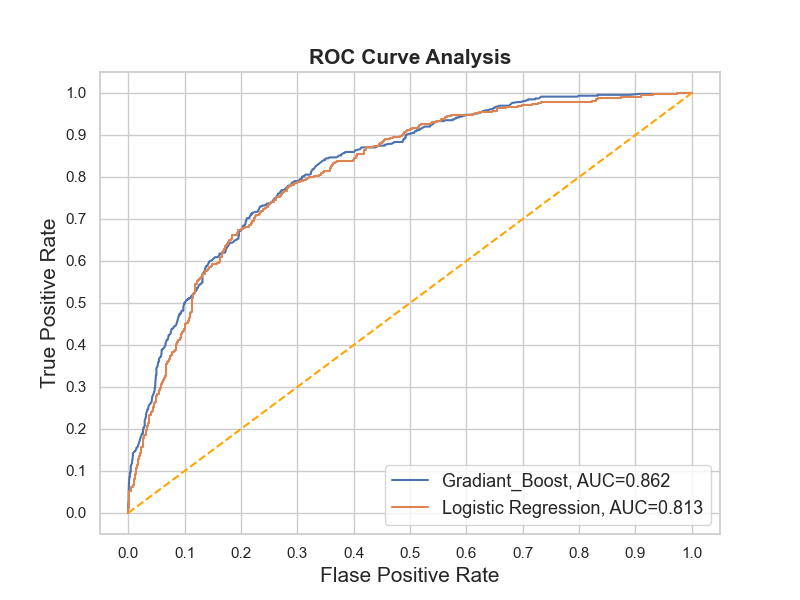

In [238]:
fig = plt.figure(figsize=(8,6))

for i in final_df.index:
    plt.plot(gradient_boost.loc[i]['FalsePositive_Test'], 
             gradient_boost.loc[i]['TruePostive_Test'], 
             label="{}, AUC={:.3f}".format(gradient_boost.loc[i]['Classifier_Name'], gradient_boost.loc[i]['Test_Score']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

<IPython.core.display.Javascript object>


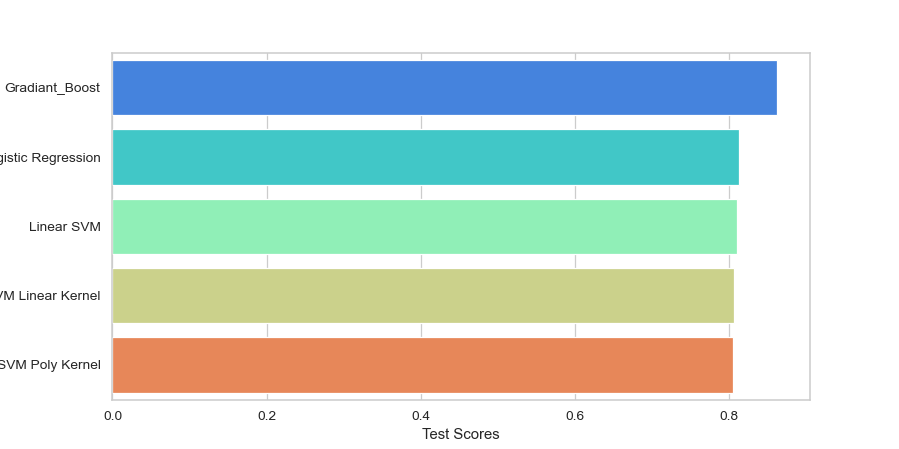

Text(0.5, 0, 'Test Scores')

In [279]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=gradient_boost['Test_Score'],y=gradient_boost['Classifier_Name'],orient='h',palette='rainbow')
plt.ylabel('Model Performance')
plt.xlabel('Test Scores')

## AdaBoost Classifier

**Decision Tree**

**Logistic Regression**

Content
- Grid Search
- Model Performance
- Comparing Model Performance and Visualization

AdaBoost first fits the classifier to the scaled dataset and then fits the defined classifier to the same dataset ut where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

### Decision Tree

In [242]:
X = df_dummies.drop('Churn', axis = 1)
y = df_dummies['Churn']
# Splitting data into train and test and Applying Standarization Technique
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#### Grid Search
Performed grid search to find the best parameter (n_estimators and Learning rate). 

In [138]:
param_grid = {'n_estimators':[100, 500, 1000],
                'learning_rate':[0.1, 0.5, 1]}

ada_grid1 = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, random_state=0), algorithm="SAMME.R"), param_grid, cv = 5, scoring= 'roc_auc')
ada_grid1.fit(X_train, y_train)

# Print the score results and parameters for the best model
print("Best parameters: {}".format(ada_grid1.best_params_))
print("Best cross-validation score: {:.2f}".format(ada_grid1.best_score_))

Best parameters: {'learning_rate': 0.1, 'n_estimators': 500}
Best cross-validation score: 0.81


#### Model Performance

After getting the best parameter from the grid search, here we will check the model performance- train score and test score.
- AdaBoosting with Deccision Tree is considered to be the advanced model in machine learning.
- It has performed significantly well and refelect the highest among all model with 100% test score. This need further investigation as there might be case of overfitting

In [ ]:
ada_clf1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 10, random_state = 0),
                           n_estimators= 500,
                           learning_rate= 0.1, algorithm="SAMME.R")
ada_clf1.fit(X_train, y_train)

# model eval function is created above
model_metric = model_eval('AdaBoost_DecisionTree',ada_clf1,X_train,X_test)

# The result_table is from the project 1 which contain the model performance.
cols = ['Classifier_Name', 'Train_Score', 'Test_Score', 'FalsePositive_Test', 'TruePostive_Test']# desired column for plot
ada_boosting= result_table[cols].append(pd.DataFrame(model_metric,columns=cols)).sort_values(by=['Test_Score'], ascending=False).head().reset_index(drop=True)

print(" The Train Score for the AdaBoost_DecisionTree: {:.4f} \n The Test Score for the AdaBoost_DecisionTree:{:.2f}".format(ada_boosting.iloc[0]['Train_Score'],ada_boosting.iloc[0]['Test_Score']))

In [256]:
ada_boosting

,Classifier_Name,Train_Score,Test_Score,FalsePositive_Test,TruePostive_Test
0,AdaBoost_DecisionTree,0.999986,0.999986,"[0.0, 0.0, 0.0015408320493066256, 0.0015408320...","[0.0, 0.0021598272138228943, 0.002159827213822..."
1,Logistic Regression,0.840114,0.812717,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.010799136069114..."
2,Linear SVM,0.839752,0.810386,"[0.0, 0.0, 0.0, 0.0015408320493066256, 0.00154...","[0.0, 0.0021598272138228943, 0.012958963282937..."
3,SVM Linear Kernel,0.838065,0.806178,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.008639308855291..."
4,SVM Poly Kernel,0.837740,0.805611,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.006479481641468..."


### Logistic Regression

#### Grid Search
Performed grid search to find the best parameter (n_estimators and Learning rate). 

In [139]:
param_grid = {'n_estimators':[100, 500, 1000],
                'learning_rate':[0.1, 0.5, 1]}

ada_grid2 = GridSearchCV(AdaBoostClassifier(LogisticRegression(C=1, penalty='l2'), algorithm="SAMME.R"), param_grid, cv = 5, scoring= 'roc_auc')
ada_grid2.fit(X_train, y_train)

# Print the score results and parameters for the best model
print("Best parameters: {}".format(ada_grid2.best_params_))
print("Best cross-validation score: {:.2f}".format(ada_grid2.best_score_))

Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best cross-validation score: 0.85


#### Model Performance
After getting the best parameter from the grid search, here we will check the model performance- train score and test score.

AdaBoosting with Logistic regression is considered to be the advanced model in machine learning.
It has performed significantly well and refelect the highest among all model with 84%% test score. This need further investigation as there might be case of overfitting

In [260]:
ada_clf2 = AdaBoostClassifier(LogisticRegression(C=1, penalty='l2'),
                           n_estimators= 100,
                           learning_rate= 0.1, algorithm="SAMME.R")
ada_clf2.fit(X_train, y_train)

# model eval function is created above
model_metric = model_eval('AdaBoost_LogisticRegression',ada_clf2,X_train,X_test)

# The result_table is from the project 1 which contain the model performance.
cols = ['Classifier_Name', 'Train_Score', 'Test_Score', 'FalsePositive_Test', 'TruePostive_Test']# desired column for plot

ada_boosting= ada_boosting[cols].append(pd.DataFrame(model_metric,columns=cols)).sort_values(by=['Test_Score'], ascending=False).head().reset_index(drop=True)

print(" The Train Score for the AdaBoost_LogisticRegression: {:.4f} \n The Test Score for the AdaBoost_LogisticRegression:{:.2f}".format(ada_boosting.iloc[0]['Train_Score'],ada_boosting.iloc[0]['Test_Score']))

 The Train Score for the AdaBoost_LogisticRegression: 1.0000 
 The Test Score for the AdaBoost_LogisticRegression:1.00


In [258]:
ada_boosting

,Classifier_Name,Train_Score,Test_Score,FalsePositive_Test,TruePostive_Test
0,AdaBoost_DecisionTree,0.999986,0.999986,"[0.0, 0.0, 0.0015408320493066256, 0.0015408320...","[0.0, 0.0021598272138228943, 0.002159827213822..."
1,AdaBoost_LogisticRegression,0.848593,0.848593,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.010799136069114..."
2,Logistic Regression,0.840114,0.812717,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.010799136069114..."
3,Linear SVM,0.839752,0.810386,"[0.0, 0.0, 0.0, 0.0015408320493066256, 0.00154...","[0.0, 0.0021598272138228943, 0.012958963282937..."
4,SVM Linear Kernel,0.838065,0.806178,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.008639308855291..."


#### Comparing Model Performance

AdaBoost with decision tree is peroforming better then AdaBoosting with logistic regression.

<IPython.core.display.Javascript object>


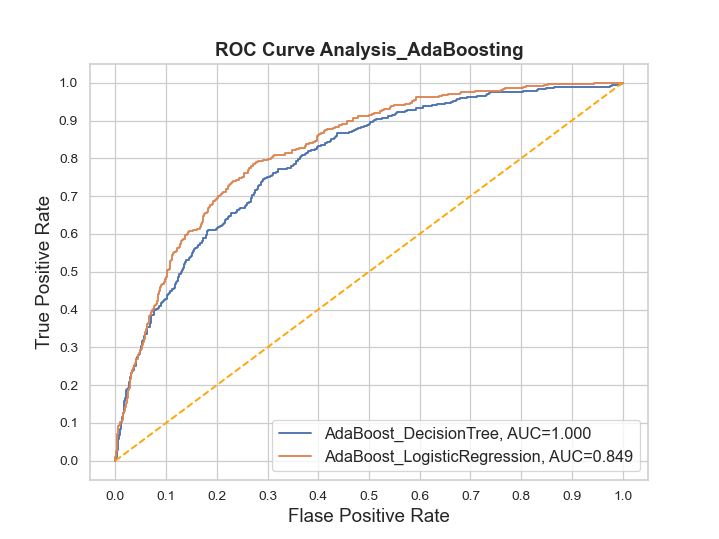

In [259]:
fig = plt.figure(figsize=(8,6))

for i in final_df.index:
    plt.plot(ada_boosting.loc[i]['FalsePositive_Test'], 
             ada_boosting.loc[i]['TruePostive_Test'], 
             label="{}, AUC={:.3f}".format(ada_boosting.loc[i]['Classifier_Name'], ada_boosting.loc[i]['Test_Score']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis_AdaBoosting', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

<IPython.core.display.Javascript object>


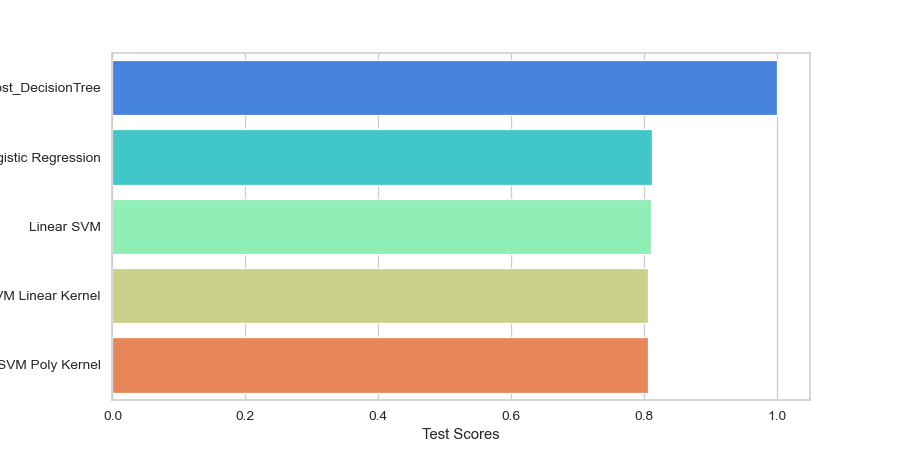

Text(0.5, 0, 'Test Scores')

In [278]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=ada_boosting['Test_Score'],y=ada_boosting['Classifier_Name'],orient='h',palette='rainbow')
plt.ylabel('Model Performance')
plt.xlabel('Test Scores')

In [282]:
bag_paste = []

## Bagging and Pasting

Bagging means bootstrap+aggregating and it is a ensemble method in which we first bootstrap our data and for each bootstrap sample we train one model. After that, we aggregate them with equal weights. When it’s not used replacement, the method is called pasting.

### Bagging

**SVC with Linear Kernel**

**SVC with Radial Kernel**

Content

- Grid Search
- Model Performance
- Comparing Model Performance and Visualization

### SVC with Linear Kernel

#### Grid Search
Performed grid search to find the best parameter (n_estimators,max_samples,max_features,n_estimators and bootstrap).

In [263]:
param_grid_21 = {'max_samples':[0.01, 0.1, 0.5, 1], 
                 'max_features':[0.01, 0.1, 0.5, 1],
                 'n_estimators':[200, 300, 400, 500],
                 'bootstrap':[True]}

bag_clf1 = BaggingClassifier(LinearSVC(C=0.1), random_state=0)

bag_grid1 = GridSearchCV(bag_clf1, param_grid = param_grid_21, cv = 5, n_jobs=-1, scoring='roc_auc')
bag_grid1.fit(X_train, y_train)

y_pred1 = bag_grid1.predict(X_test)

# Print the score results and parameters for the best model
print("Best parameters: {}".format(bag_grid1.best_params_))
print("Best cross-validation score: {:.2f}".format(bag_grid1.best_score_))

Best parameters: {'bootstrap': True, 'max_features': 0.5, 'max_samples': 0.1, 'n_estimators': 500}
Best cross-validation score: 0.84


#### Model Performance

After getting the best parameter from the grid search, here we will check the model performance- train score and test score.

Bagging with SVC with Linear Kernel performed better than logistic regression. The train and test score is 83% and there are only 17% missclassification error.

In [283]:
from sklearn.ensemble import BaggingClassifier
bag_linear_SVC = BaggingClassifier(LinearSVC(C=0.1),max_features= 0.5, n_estimators=500, max_samples=0.1, bootstrap=True, n_jobs=-1, random_state=0)

# model eval function is created above
model_metric = model_eval('Bagging_Linear_SVC',bag_linear_SVC,X_train,X_test)

# The result_table is from the project 1 which contain the model performance.
cols = ['Classifier_Name', 'Train_Score', 'Test_Score', 'FalsePositive_Test', 'TruePostive_Test']# desired column for plot
bag_paste= result_table[cols].append(pd.DataFrame(model_metric,columns=cols)).sort_values(by=['Test_Score'], ascending=False).head().reset_index(drop=True)

print(" The Train Score for the Bagging_Linear_SVC: {:.2f} \n The Test Score for the Bagging_Linear_SVC:{:.2f}".format(bag_paste.iloc[0]['Train_Score'],bag_paste.iloc[0]['Test_Score']))

 The Train Score for the Bagging_Linear_SVC: 0.83 
 The Test Score for the Bagging_Linear_SVC:0.83


In [284]:
bag_paste

,Classifier_Name,Train_Score,Test_Score,FalsePositive_Test,TruePostive_Test
0,Bagging_Linear_SVC,0.830280,0.830280,"[0.0, 0.0, 0.0015408320493066256, 0.0030816640...","[0.0, 0.004319654427645789, 0.0151187904967602..."
1,Logistic Regression,0.840114,0.812717,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.010799136069114..."
2,Linear SVM,0.839752,0.810386,"[0.0, 0.0, 0.0, 0.0015408320493066256, 0.00154...","[0.0, 0.0021598272138228943, 0.012958963282937..."
3,SVM Linear Kernel,0.838065,0.806178,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.008639308855291..."
4,SVM Poly Kernel,0.837740,0.805611,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.006479481641468..."


### SVC with Radial Kernel

#### Grid Search¶
Performed grid search to find the best parameter (n_estimators,max_samples,max_features,n_estimators and bootstrap).

In [140]:
param_grid_21 = {'max_samples':[0.01, 0.1, 0.5, 1], 
                 'max_features':[0.01, 0.1, 0.5, 1],
                 'n_estimators':[200, 300, 400, 500],
                 'bootstrap':[True]}

bag_clf2 = BaggingClassifier(SVC(C=0.1, gamma=0.01), random_state=0)

bag_grid2 = GridSearchCV(bag_clf2, param_grid = param_grid_21, cv = 5, scoring='roc_auc')
bag_grid2.fit(X_train, y_train)

y_pred2 = bag_grid2.predict(X_test)

# Print the score results and parameters for the best model
print("Best parameters: {}".format(bag_grid2.best_params_))
print("Best cross-validation score: {:.2f}".format(bag_grid2.best_score_))

Best parameters: {'bootstrap': True, 'max_features': 0.1, 'max_samples': 0.1, 'n_estimators': 500}
Best cross-validation score: 0.84


#### Model Performance

From the model performance we can see that **Bagging with SVC(Radial Kernel)** has performed poorly on dataset. This is not the best classifier for our model. It has test score of 83%

In [285]:
# Model
Bagging_RadialKernel_SVC = BaggingClassifier(SVC(C=0.1, gamma=0.01), max_features= 0.1, n_estimators=500, max_samples=0.1, bootstrap=True, n_jobs=-1, random_state=0)

# model eval function is created above
model_metric = model_eval('Bagging_RadialKernel_SVC',Bagging_RadialKernel_SVC,X_train,X_test)

# The result_table is from the project 1 which contain the model performance.
cols = ['Classifier_Name', 'Train_Score', 'Test_Score', 'FalsePositive_Test', 'TruePostive_Test']# desired column for plot
bag_paste= bag_paste[cols].append(pd.DataFrame(model_metric,columns=cols)).sort_values(by=['Test_Score'], ascending=False).reset_index(drop=True)

print(" The Train Score for the Bagging_RadialKernel_SVC: {:.2f} \n The Test Score for the Bagging_RadialKernel_SVC:{:.2f}".format(bag_paste.iloc[0]['Train_Score'],bag_paste.iloc[0]['Test_Score']))

 The Train Score for the Bagging_RadialKernel_SVC: 0.83 
 The Test Score for the Bagging_RadialKernel_SVC:0.83


In [286]:
bag_paste

,Classifier_Name,Train_Score,Test_Score,FalsePositive_Test,TruePostive_Test
0,Bagging_Linear_SVC,0.830280,0.830280,"[0.0, 0.0, 0.0015408320493066256, 0.0030816640...","[0.0, 0.004319654427645789, 0.0151187904967602..."
1,Logistic Regression,0.840114,0.812717,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.010799136069114..."
2,Linear SVM,0.839752,0.810386,"[0.0, 0.0, 0.0, 0.0015408320493066256, 0.00154...","[0.0, 0.0021598272138228943, 0.012958963282937..."
3,SVM Linear Kernel,0.838065,0.806178,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.008639308855291..."
4,SVM Poly Kernel,0.837740,0.805611,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.006479481641468..."
5,Bagging_RadialKernel_SVC,0.500000,0.500000,"[0.0, 1.0]","[0.0, 1.0]"


### Pasting

**Decision Tree**

**SVC with Polynomial Kernel**

### Decision Tree

#### Grid Search¶
Performed grid search to find the best parameter (n_estimators,max_samples,max_features,n_estimators and bootstrap).

In [141]:
param_grid_21 = {'max_samples':[0.01, 0.1, 0.5, 1], 
                 'max_features':[0.01, 0.1, 0.5, 1],
                 'n_estimators':[200, 300, 400, 500]}

paste_clf1 = BaggingClassifier(DecisionTreeClassifier(max_depth = 4, random_state = 0), random_state=0)

paste_grid1 = GridSearchCV(paste_clf1, param_grid = param_grid_21, cv = 5, n_jobs=-1, scoring='roc_auc')
paste_grid1.fit(X_train, y_train)

y_pred3 = paste_grid1.predict(X_test)

# Print the score results and parameters for the best model
print("Best parameters: {}".format(paste_grid1.best_params_))
print("Best cross-validation score: {:.2f}".format(paste_grid1.best_score_))

Best parameters: {'bootstrap': True, 'max_features': 0.5, 'max_samples': 0.1, 'n_estimators': 400}
Best cross-validation score: 0.85


#### Model Performance

Pasting with decision tree is performing better than any model in the bagging with 86% test score.

In [287]:
from sklearn.ensemble import BaggingClassifier
pasting_dcsn_tree = BaggingClassifier(DecisionTreeClassifier(max_depth = 4, random_state = 0), max_features = 0.5, n_estimators=400, max_samples=0.1, bootstrap=False, n_jobs=-1, random_state=0)

# model eval function is created above
model_metric = model_eval('Pasting_Decision_Tree',pasting_dcsn_tree,X_train,X_test)

# The result_table is from the project 1 which contain the model performance.
cols = ['Classifier_Name', 'Train_Score', 'Test_Score', 'FalsePositive_Test', 'TruePostive_Test']# desired column for plot
bag_paste= bag_paste[cols].append(pd.DataFrame(model_metric,columns=cols)).sort_values(by=['Test_Score'], ascending=False).reset_index(drop=True)

print(" The Train Score for the Pasting_Decision_Tree: {:.2f} \n The Test Score for the Pasting_Decision_Tree:{:.2f}".format(bag_paste.iloc[0]['Train_Score'],bag_paste.iloc[0]['Test_Score']))

 The Train Score for the Pasting_Decision_Tree: 0.86 
 The Test Score for the Pasting_Decision_Tree:0.86


In [288]:
bag_paste

,Classifier_Name,Train_Score,Test_Score,FalsePositive_Test,TruePostive_Test
0,Pasting_Decision_Tree,0.859772,0.859772,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00077041...","[0.0, 0.0021598272138228943, 0.004319654427645..."
1,Bagging_Linear_SVC,0.830280,0.830280,"[0.0, 0.0, 0.0015408320493066256, 0.0030816640...","[0.0, 0.004319654427645789, 0.0151187904967602..."
2,Logistic Regression,0.840114,0.812717,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.010799136069114..."
3,Linear SVM,0.839752,0.810386,"[0.0, 0.0, 0.0, 0.0015408320493066256, 0.00154...","[0.0, 0.0021598272138228943, 0.012958963282937..."
4,SVM Linear Kernel,0.838065,0.806178,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.008639308855291..."
5,SVM Poly Kernel,0.837740,0.805611,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.006479481641468..."
6,Bagging_RadialKernel_SVC,0.500000,0.500000,"[0.0, 1.0]","[0.0, 1.0]"


### SVC with Poly Kernel

#### Grid Search¶
Performed grid search to find the best parameter (n_estimators,max_samples,max_features,n_estimators and bootstrap).

In [145]:
param_grid_21 = {'max_samples':[0.01, 0.1, 0.5, 1], 
                 'max_features':[0.01, 0.1, 0.5, 1],
                 'n_estimators':[200, 300, 400, 500]}

paste_clf2 = BaggingClassifier(SVC(C= 0.01, degree= 1, gamma=1), random_state=0)

paste_grid2 = GridSearchCV(paste_clf2, param_grid = param_grid_21, cv = 5, n_jobs=-1, scoring='roc_auc')
paste_grid2.fit(X_train, y_train)

y_pred3 = paste_grid2.predict(X_test)

# Print the score results and parameters for the best model
print("Best parameters: {}".format(paste_grid2.best_params_))
print("Best cross-validation score: {:.2f}".format(paste_grid2.best_score_))

Best parameters: {'bootstrap': True, 'max_features': 0.1, 'max_samples': 0.5, 'n_estimators': 500}
Best cross-validation score: 0.83


#### Model Performance

Pasting with SVC(poly kernel) is performing slightly better than Bagging with Radial Kernal with 79% test score.

In [289]:
from sklearn.ensemble import BaggingClassifier
pasting_SVC_polyKernel = BaggingClassifier(SVC(C= 0.01, degree= 1, gamma=1),max_features = 0.1, n_estimators=500, max_samples=0.5, bootstrap=False, n_jobs=-1, random_state=0)

# model eval function is created above
model_metric = model_eval('Pasting_SVC_PolyKernel',pasting_SVC_polyKernel,X_train,X_test)

# The result_table is from the project 1 which contain the model performance.
cols = ['Classifier_Name', 'Train_Score', 'Test_Score', 'FalsePositive_Test', 'TruePostive_Test']# desired column for plot
bag_paste= bag_paste[cols].append(pd.DataFrame(model_metric,columns=cols)).sort_values(by=['Test_Score'], ascending=False).reset_index(drop=True)

print(" The Train Score for the Pasting_SVC_PolyKernel: {:.2f} \n The Test Score for the Pasting_SVC_PolyKernel:{:.2f}".format(bag_paste.iloc[0]['Train_Score'],bag_paste.iloc[0]['Test_Score']))

 The Train Score for the Pasting_SVC_PolyKernel: 0.86 
 The Test Score for the Pasting_SVC_PolyKernel:0.86


In [290]:
bag_paste

,Classifier_Name,Train_Score,Test_Score,FalsePositive_Test,TruePostive_Test
0,Pasting_Decision_Tree,0.859772,0.859772,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00077041...","[0.0, 0.0021598272138228943, 0.004319654427645..."
1,Bagging_Linear_SVC,0.830280,0.830280,"[0.0, 0.0, 0.0015408320493066256, 0.0030816640...","[0.0, 0.004319654427645789, 0.0151187904967602..."
2,Logistic Regression,0.840114,0.812717,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.010799136069114..."
3,Linear SVM,0.839752,0.810386,"[0.0, 0.0, 0.0, 0.0015408320493066256, 0.00154...","[0.0, 0.0021598272138228943, 0.012958963282937..."
4,SVM Linear Kernel,0.838065,0.806178,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.008639308855291..."
5,SVM Poly Kernel,0.837740,0.805611,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00077...","[0.0, 0.0021598272138228943, 0.006479481641468..."
6,Pasting_SVC_PolyKernel,0.792384,0.792384,"[0.0, 0.0, 0.0, 0.0007704160246533128, 0.00154...","[0.0, 0.0021598272138228943, 0.008639308855291..."
7,Bagging_RadialKernel_SVC,0.500000,0.500000,"[0.0, 1.0]","[0.0, 1.0]"


#### Visualization

The best Model when comparing bagging and pasting with project1 models then **Pasting with DecisionTree** is the better than logsitic regression, which was the best model in project 1. 

<IPython.core.display.Javascript object>


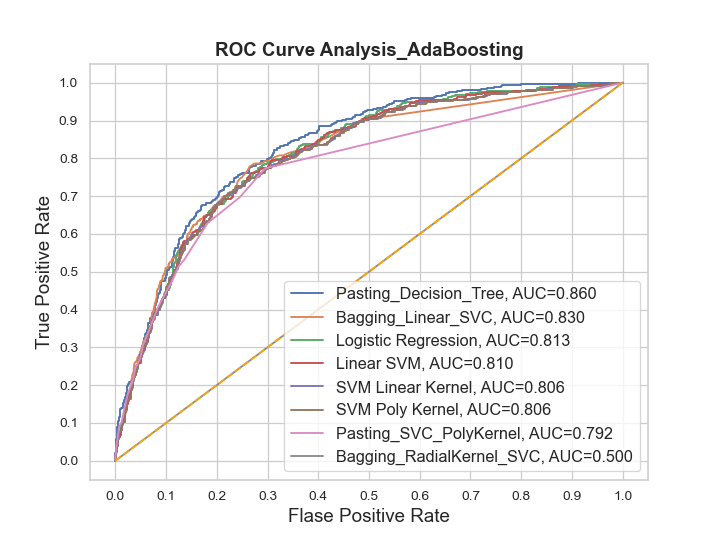

i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7


In [321]:
fig = plt.figure(figsize=(8,6))

for i in bag_paste.index:
    print("i: ", i)
    plt.plot(bag_paste.loc[i]['FalsePositive_Test'], 
             bag_paste.loc[i]['TruePostive_Test'], 
             label="{}, AUC={:.3f}".format(bag_paste.loc[i]['Classifier_Name'], bag_paste.loc[i]['Test_Score']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis_AdaBoosting', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

<IPython.core.display.Javascript object>


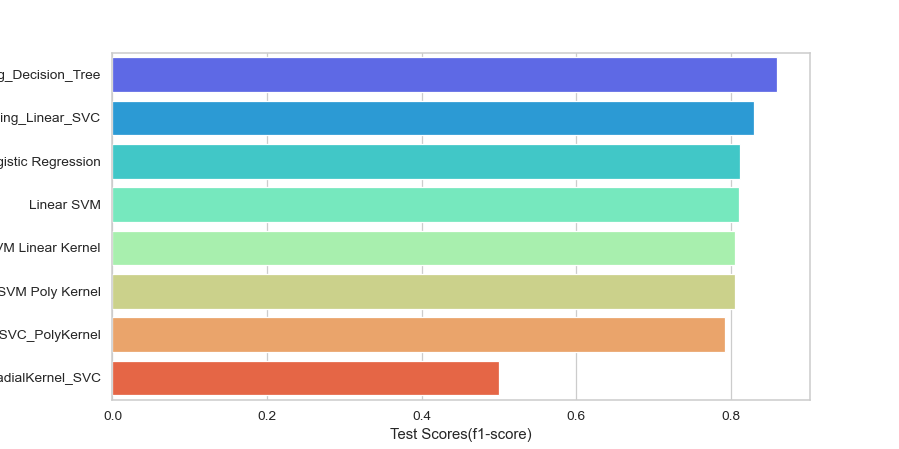

Text(0.5, 0, 'Test Scores(f1-score)')

In [292]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=bag_paste['Test_Score'],y=bag_paste['Classifier_Name'],orient='h',palette='rainbow')
plt.ylabel('Model Performance')
plt.xlabel('Test Scores(f1-score)')

## Deep Learning

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf

Fully connected layers are defined using the Dense class. Specified the number of neurons in the layer as the first argument, the initialization method as the second argument as init and specify the activation function using the activation argument.
- uniform distribution ('uniform'): Random number generated between 0 and 0.05
- Normal ('normal'): small random numbers generated from a Gaussian distribution
- Here used sigmoid on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability   of class 1 or snap to a hard classification of either class with a default threshold of 0.5.

Before we feed the data to our network, it must be converted into the format required by the network. This is called preparing data for the network. It generally consists of converting a multi-dimensional input to a single-dimension vector and scaling the data points.

In [306]:
X = df_dummies.drop('Churn', axis = 1)
y = df_dummies['Churn']
# Splitting data into train and test and Applying Standarization Technique
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

A 12–8–1 dense layered model with a decaying learning rate.

- Creating and Compiling Model
Parameters:

- Metric -  AUC (Area under the curve), in our dataset there is high **Imbalance issue** so accuracy is not best metric.

In [146]:
def create_model():    
    model = Sequential()
    model.add(Dense(41,input_dim=40,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(3,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
#     model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['auc'])
    model.compile(optimizer = 'adam',loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])
    return model

#### Grid Search

The Keras models are hypertuned for batch_size and batch_size. The hyper parameter tuned model shows similar performance as the dataset is smaller than usual neural network applications.

In [293]:
deep_learning_model = KerasClassifier(build_fn= create_model,verbose=0)

# grid_params_deep = {'batch_size':[10,20,30,40],
#                     'epochs':[10,25,50,100,250,500,1000]}
grid_params_deep = {'batch_size':[10,20],
                    'epochs':[10,25,50,100]}
grid_deep_learning = GridSearchCV(estimator=deep_learning_model,param_grid=grid_params_deep,cv=5,verbose=3,n_jobs=-1,scoring='roc_auc')
grid_deep_learning.fit(X_train,y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  9.5min finished


Best parameters selected by best Keras Classifier model on reduced dataset: {'batch_size': 10, 'epochs': 10}


In [296]:
#Print the score results and parameters for the best model 
print("Best Score: {0:.4f}".format(grid_deep_learning.best_score_))
print("Parameters selected by best Keras Classifier model:", grid_deep_learning.best_estimator_)
print("Best parameters selected by best Keras Classifier model on reduced dataset:", grid_deep_learning.best_params_)

Best Score: 0.8343
Parameters selected by best Keras Classifier model: <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000016008B8AF88>
Best parameters selected by best Keras Classifier model on reduced dataset: {'batch_size': 10, 'epochs': 10}


From the above deep learning model we see that, the best score of the Keras Classifier model on the dataset is 0.5482. Also the best parameters identified by the grid search and 5 fold validation are 'batch_size': 20, 'epochs': 10.

In [307]:
logresults_deeplearning = pd.DataFrame(grid_deep_learning.cv_results_)
logresults_deeplearning.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_epochs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,14.977312,0.157798,0.878298,0.262410,10,10,"{'batch_size': 10, 'epochs': 10}",0.849359,0.842276,0.818755,0.825083,0.836228,0.834340,0.011142,1
1,35.706172,1.803922,1.114362,0.283179,10,25,"{'batch_size': 10, 'epochs': 25}",0.823290,0.818276,0.789843,0.806180,0.831012,0.813720,0.014410,3
2,70.913140,1.765794,1.508937,0.137304,10,50,"{'batch_size': 10, 'epochs': 50}",0.785929,0.786669,0.760209,0.759689,0.781280,0.774755,0.012231,6
3,148.081448,7.686663,1.345230,0.376678,10,100,"{'batch_size': 10, 'epochs': 100}",0.793108,0.764243,0.743253,0.753566,0.741018,0.759038,0.018930,7
4,12.522142,1.483100,0.924675,0.232347,20,10,"{'batch_size': 20, 'epochs': 10}",0.845581,0.807953,0.809370,0.811545,0.824908,0.819871,0.014198,2


<IPython.core.display.Javascript object>


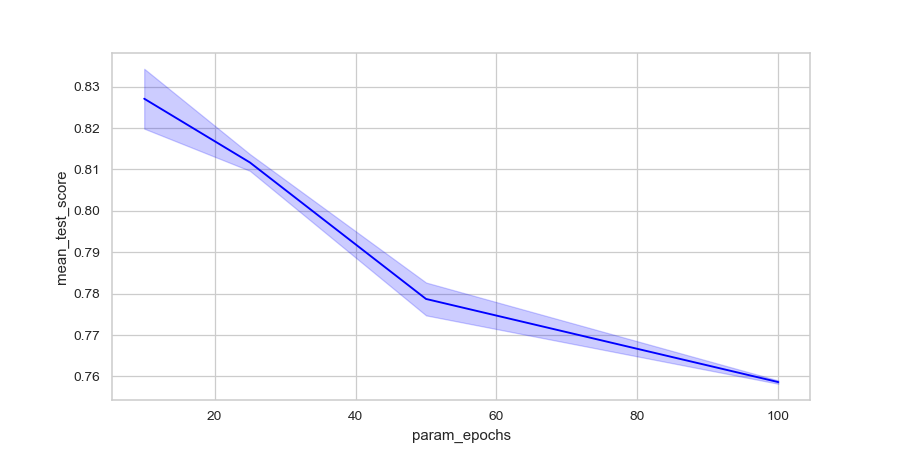

In [308]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(x=logresults_deeplearning['param_epochs'],y=logresults_deeplearning['mean_test_score'],color='blue')

<IPython.core.display.Javascript object>


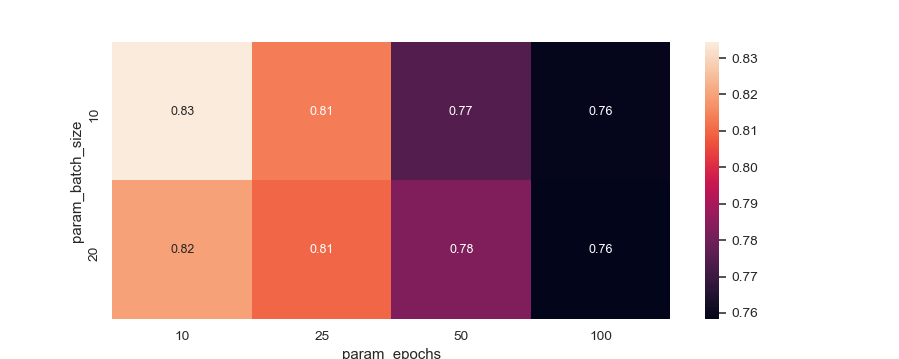

In [309]:
fig = plt.figure(figsize=(10,4),dpi=100)
sns.heatmap(logresults_deeplearning.pivot_table(index='param_batch_size',columns='param_epochs',values='mean_test_score'),annot=True)

From the above analysis we can see that the best score can be obtained when the test score with the Keras Classifier model is used with epochs = 10 and batch size = 20.

### Applying best parameters

In [310]:
model = Sequential()
model.add(Dense(41,input_dim=40,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=[tf.keras.metrics.AUC()])

In [311]:
model.fit(X_train,y_train,epochs=10,batch_size=20,validation_data=(X_test,y_test))

Epoch 1/10
265/265 [==============================] - 2s 4ms/step - loss: 0.5187 - auc_3: 0.7381 - val_loss: 0.4475 - val_auc_3: 0.8198
Epoch 2/10
265/265 [==============================] - 1s 2ms/step - loss: 0.4142 - auc_3: 0.8472 - val_loss: 0.4411 - val_auc_3: 0.8218
Epoch 3/10
265/265 [==============================] - 1s 2ms/step - loss: 0.4146 - auc_3: 0.8444 - val_loss: 0.4437 - val_auc_3: 0.8216
Epoch 4/10
265/265 [==============================] - 1s 2ms/step - loss: 0.4080 - auc_3: 0.8527 - val_loss: 0.4433 - val_auc_3: 0.8243
Epoch 5/10
265/265 [==============================] - 1s 2ms/step - loss: 0.3978 - auc_3: 0.8600 - val_loss: 0.4452 - val_auc_3: 0.8228
Epoch 6/10
265/265 [==============================] - 1s 2ms/step - loss: 0.4093 - auc_3: 0.8526 - val_loss: 0.4521 - val_auc_3: 0.8136
Epoch 7/10
265/265 [==============================] - 1s 2ms/step - loss: 0.3932 - auc_3: 0.8656 - val_loss: 0.4442 - val_auc_3: 0.8211
Epoch 8/10
265/265 [============================

In [312]:
output_deeplearning = pd.DataFrame(model.history.history)
output_deeplearning.head()

,loss,auc_3,val_loss,val_auc_3
0,0.466254,0.799126,0.447466,0.819850
1,0.423024,0.840375,0.441068,0.821772
2,0.413943,0.848287,0.443728,0.821632
3,0.407351,0.853923,0.443318,0.824295
4,0.402749,0.857644,0.445196,0.822845


From the below plot we can see that the loss for both train and validation are decreasing gradually. After 2.5 the loss on the useen data(validation) are higher than training loss.

<IPython.core.display.Javascript object>


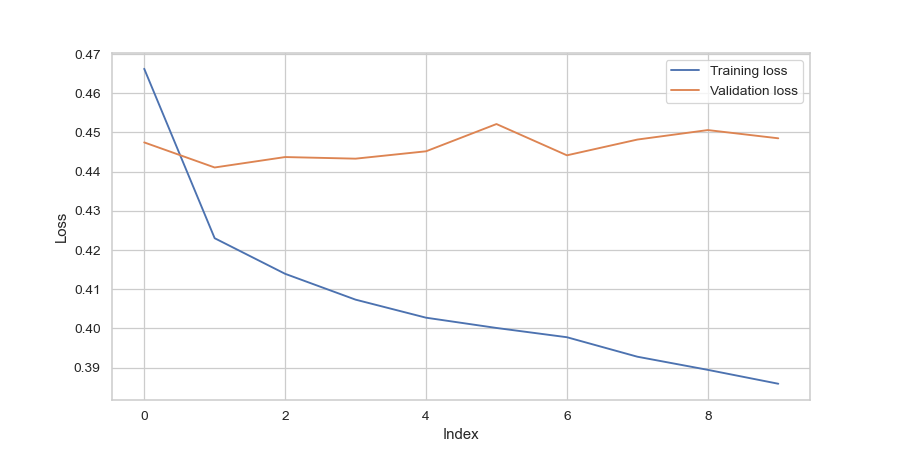

Text(0.5, 0, 'Index')

In [313]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(x= output_deeplearning.index,y=output_deeplearning['loss'],label='Training loss')
sns.lineplot(x= output_deeplearning.index,y=output_deeplearning['val_loss'],label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Index')

The training and validation AUC plot will return the area under the curve. The ROC curve. n contrast, PR curves are specifically tailored for the detection of rare events and are pretty useful in those scenarios. 
They will show that your classifier has a low performance if it is misclassifying most or all of the minority class. But they don't translate well to more balanced cases or cases where negatives are rare.

<IPython.core.display.Javascript object>


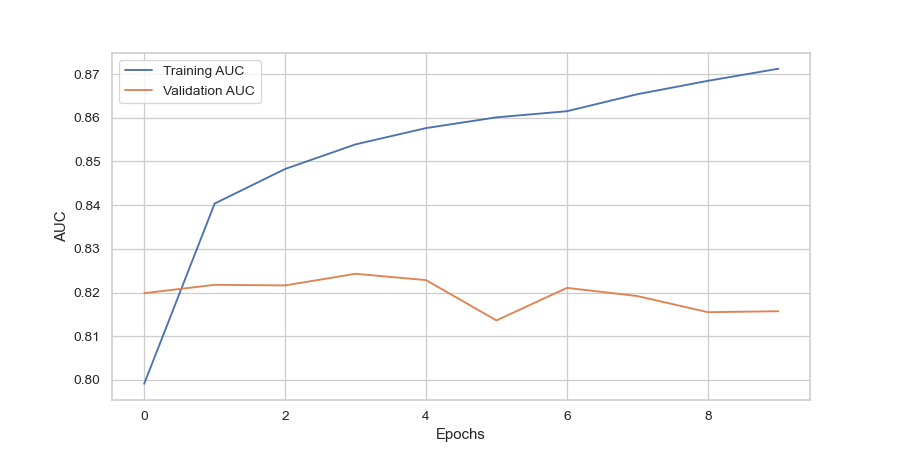

Text(0.5, 0, 'Epochs')

In [315]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(x= output_deeplearning.index,y=output_deeplearning['auc_3'],label='Training AUC')
sns.lineplot(x= output_deeplearning.index,y=output_deeplearning['val_auc_3'],label='Validation AUC')
plt.ylabel('AUC')
plt.xlabel('Epochs')

In [316]:
model.predict_classes(X_test)
print(classification_report(y_test,model.predict_classes(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1298
           1       0.64      0.49      0.55       463

    accuracy                           0.79      1761
   macro avg       0.73      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761



Thus from the above classification report we see that, the Deep Learning Model trained to maximize the recall score gives the recall of 49%.